In [28]:
from objectives import get_precomputed_optimal_bitstrings

In [30]:
for N in range(5, 32):
    print(N, len(get_precomputed_optimal_bitstrings(N)))

5 4
6 28
7 4
8 16
9 24
10 40
11 4
12 16
13 4
14 72
15 8
16 32
17 44
18 16
19 8
20 8
21 4
22 24
23 24
24 8
25 8
26 24
27 4
28 8
29 8
30 16
31 8


In [308]:
df = get_df_from_wildcard("fourier_MF_13*.pickle")
df2 = get_df_from_wildcard("1213_fourier_MF_13*.pickle")

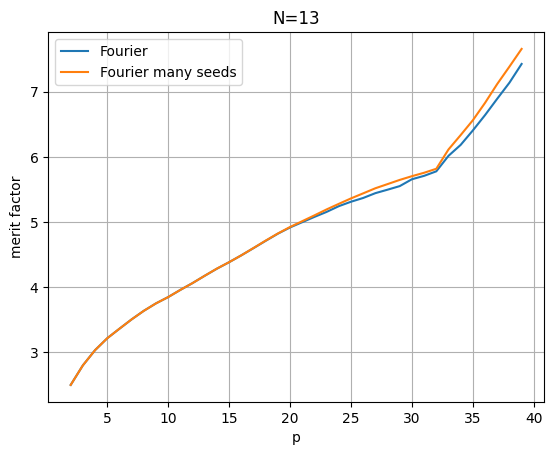

In [310]:
N = 13
max_p = 40
for label_to_plot in ['merit factor']:
    f, ax = plt.subplots()
    for label, df_tran in [
        ("Fourier", df), ("Fourier many seeds", df2), 
    ]:
        df_tran[(df_tran['N'] == N) & (df_tran['p'] < max_p)].sort_values('p').set_index('p')[label_to_plot].plot(legend=True, ax=ax, label=label)
        
    plt.title(f"N={N}")
    ax.set_ylabel(label_to_plot)
    plt.grid()
    plt.show()

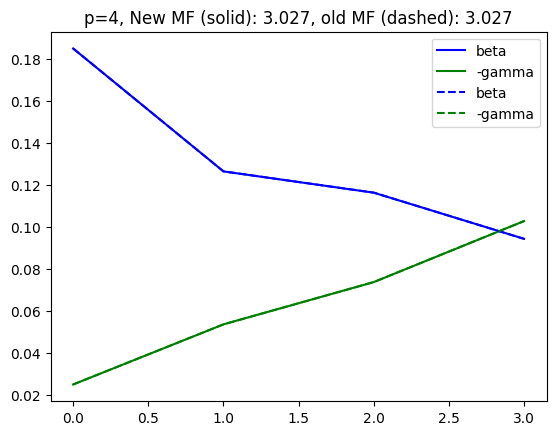

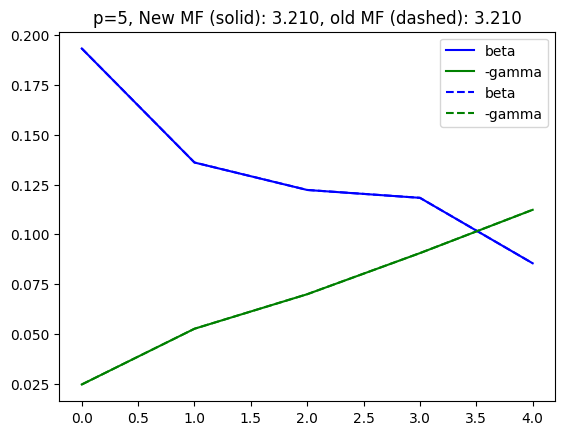

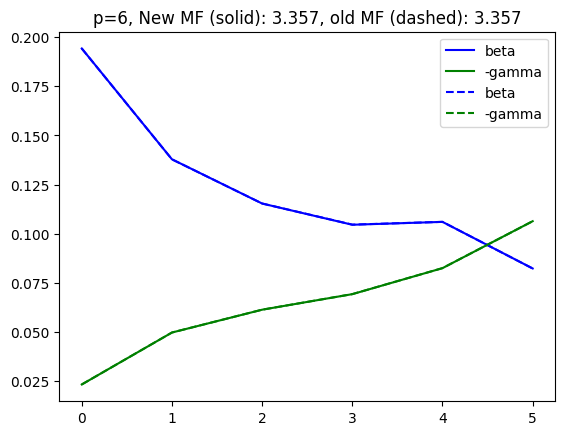

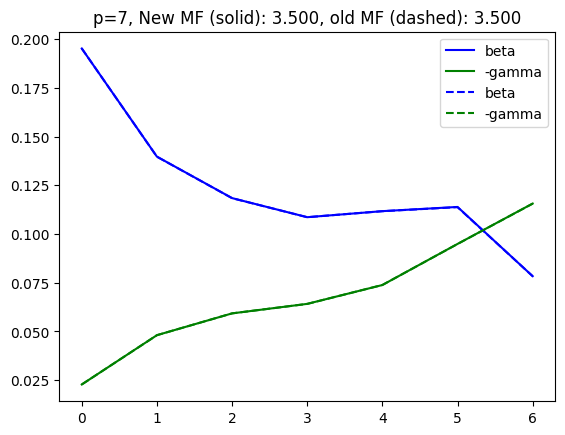

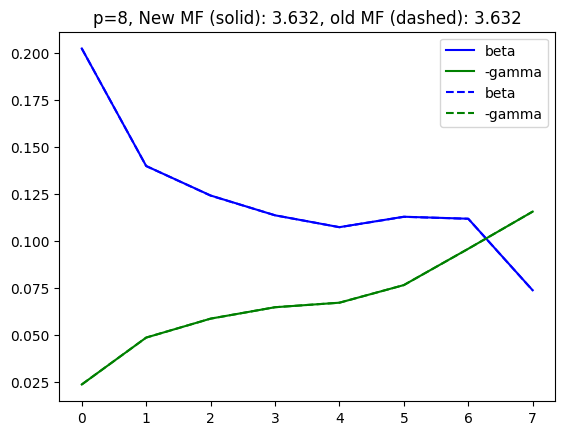

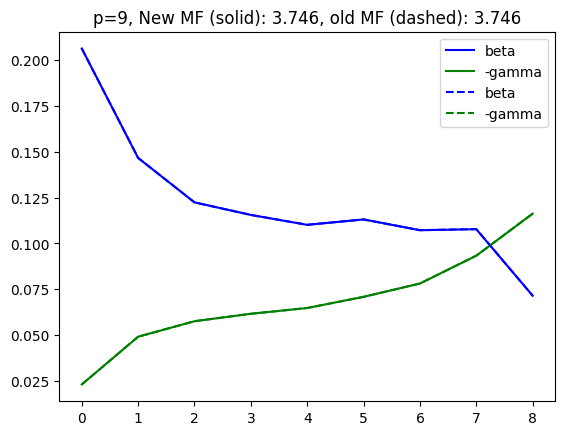

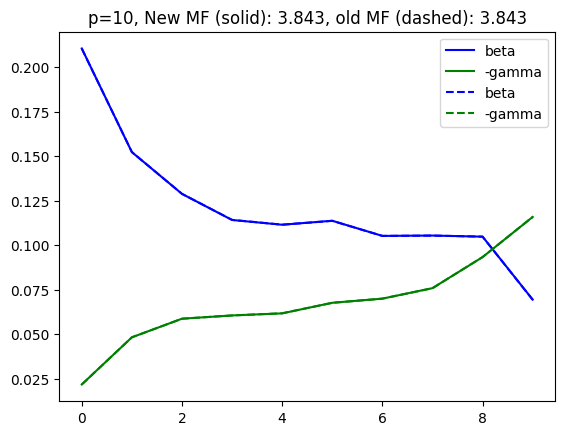

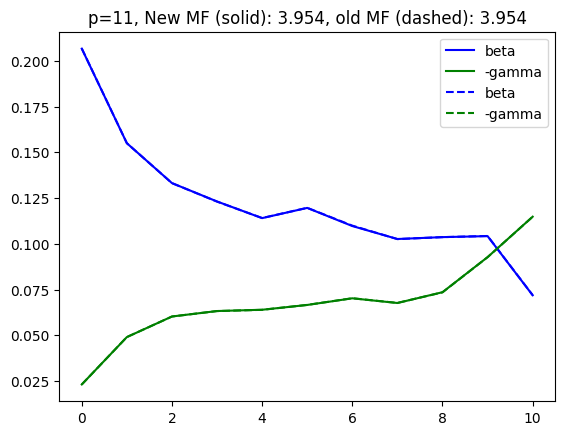

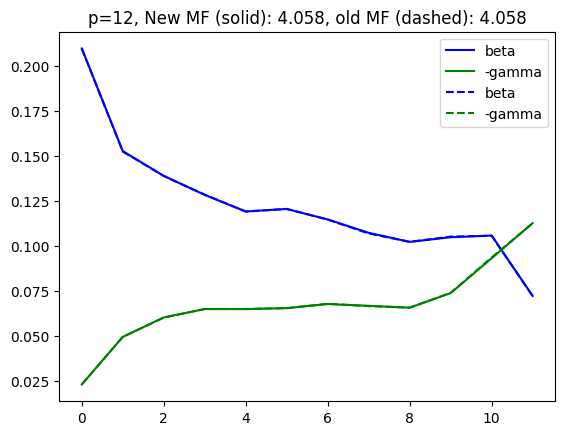

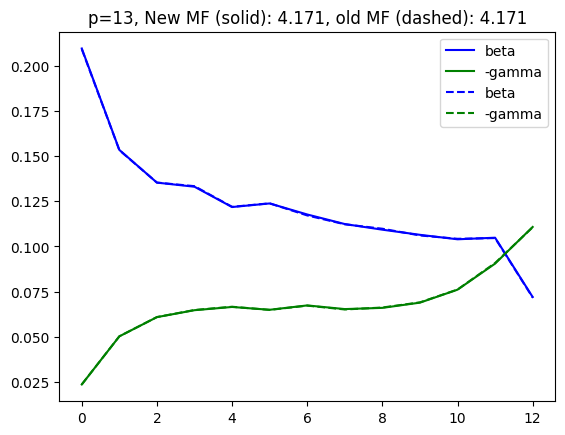

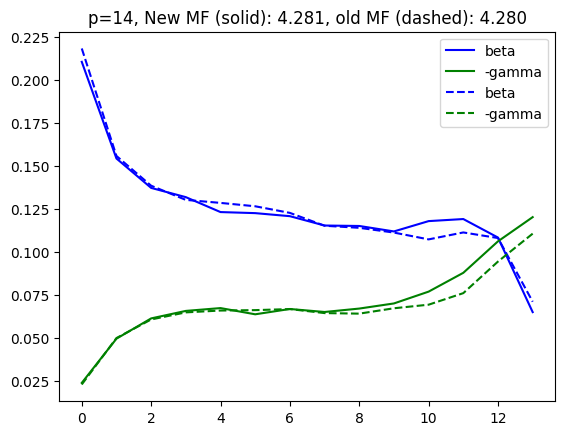

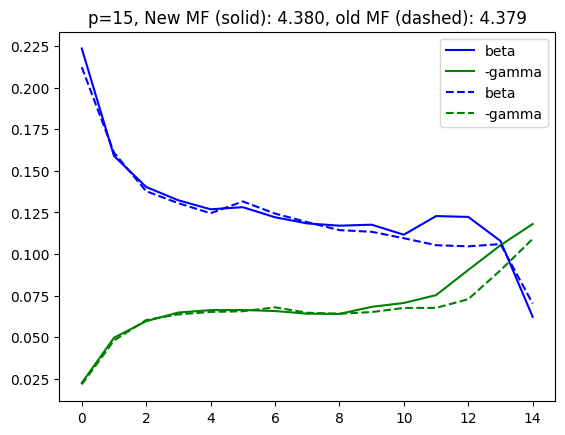

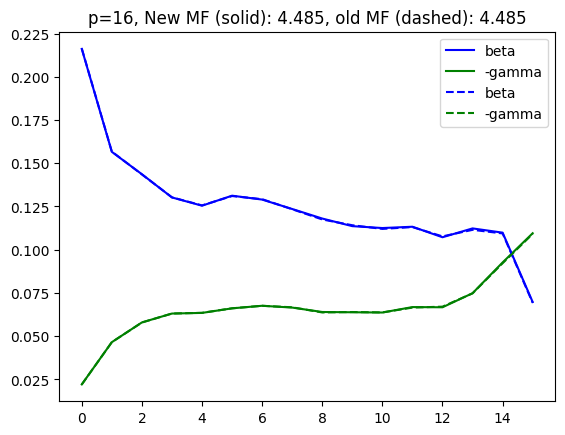

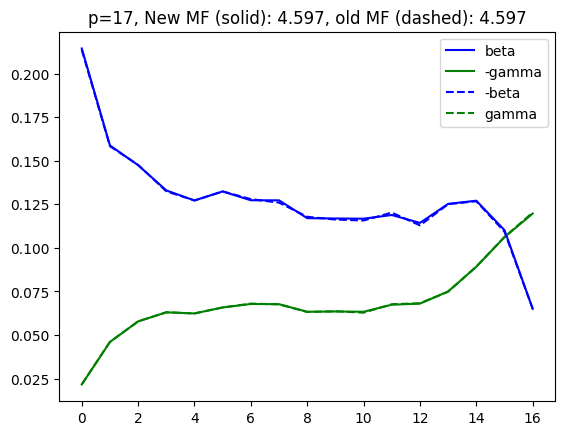

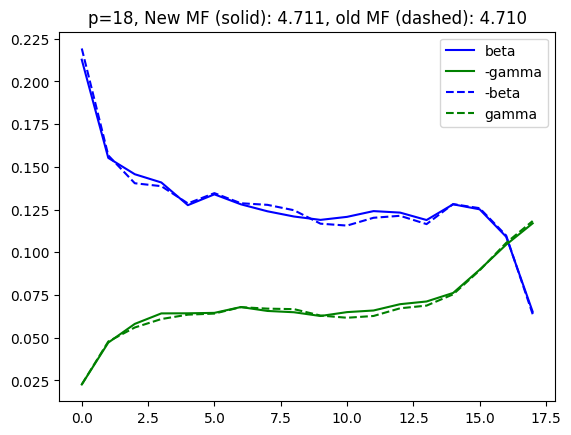

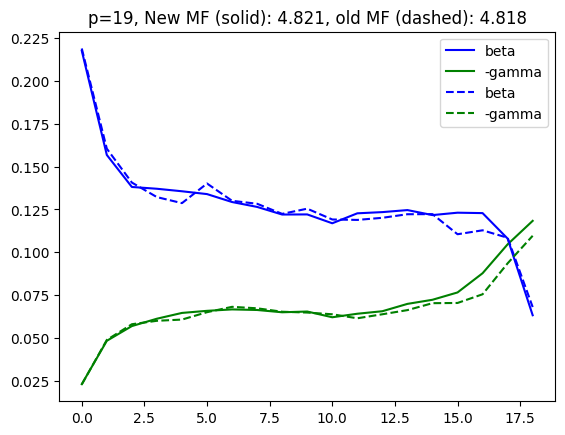

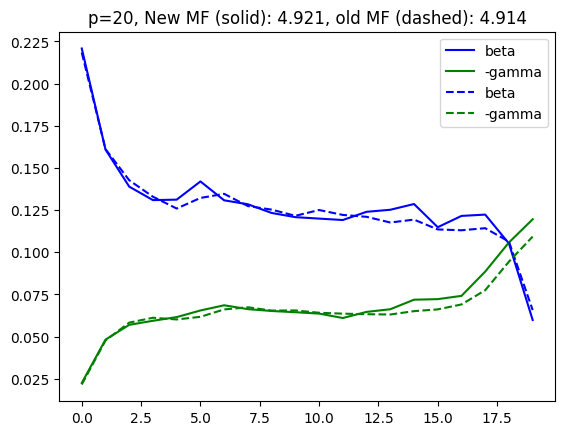

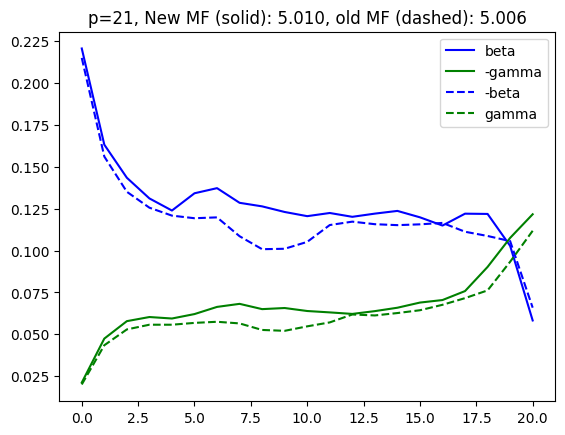

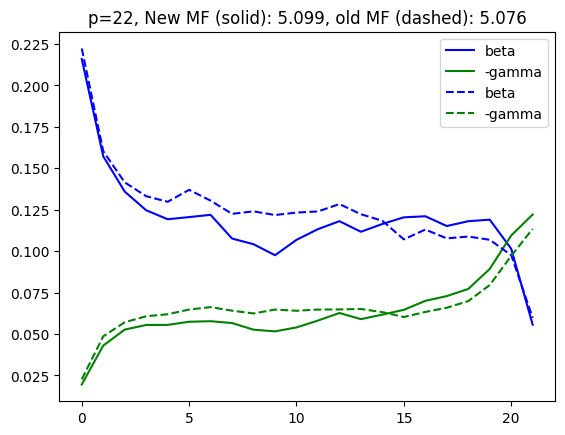

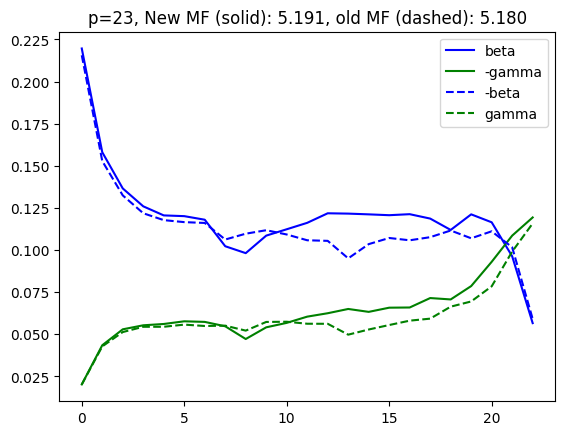

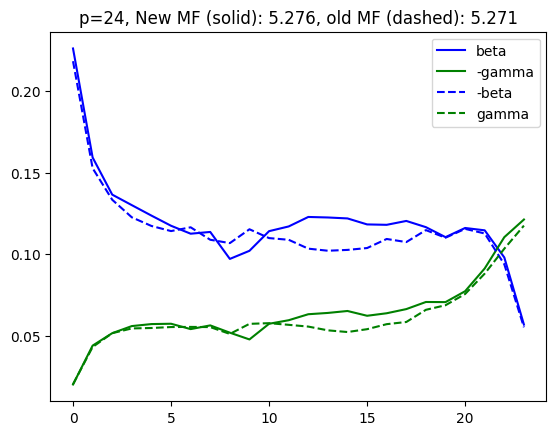

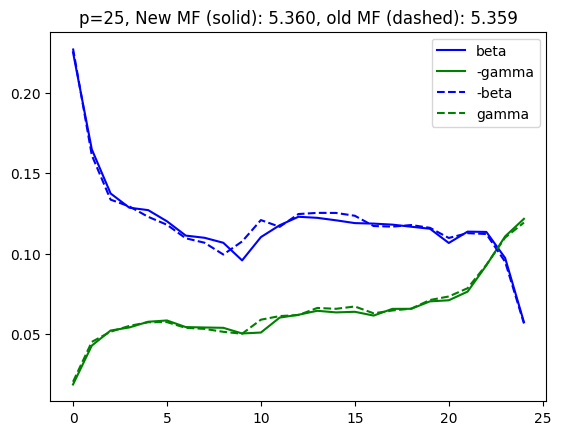

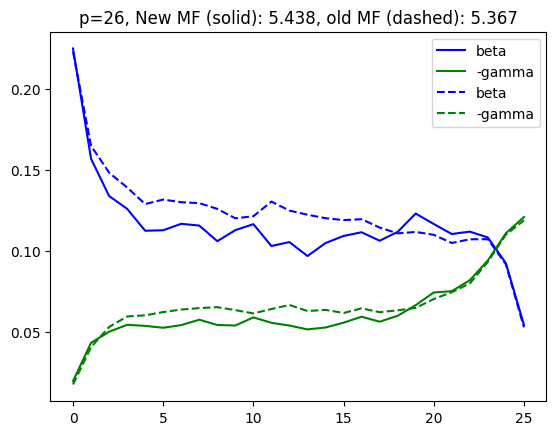

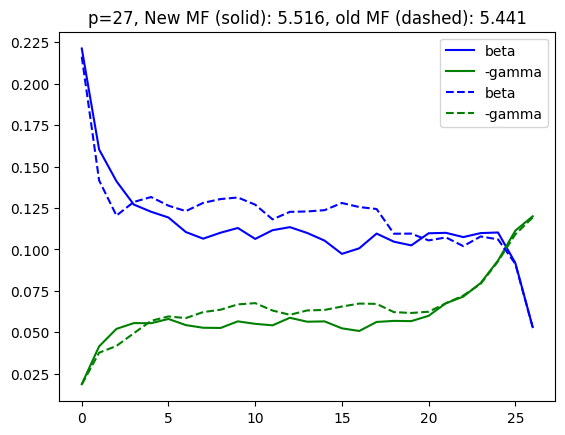

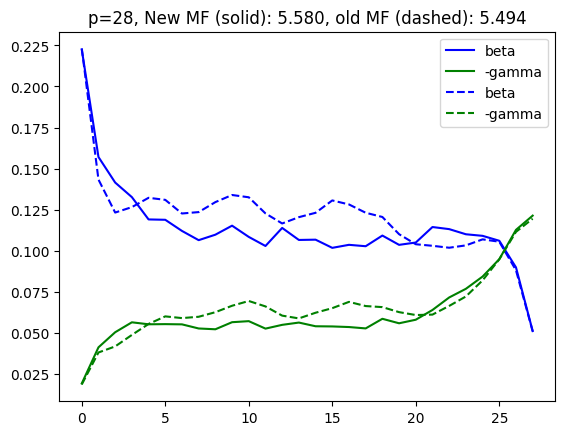

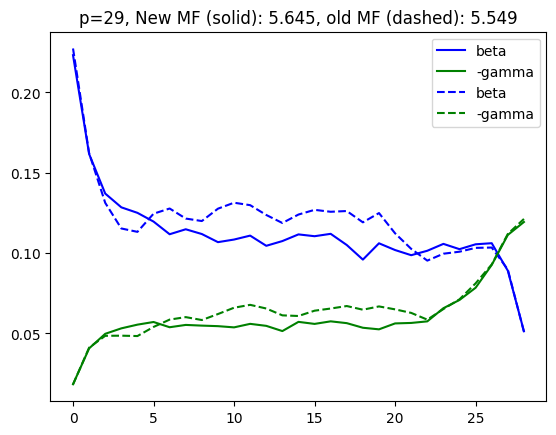

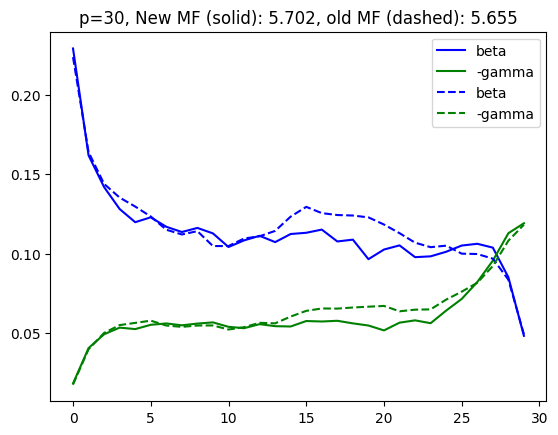

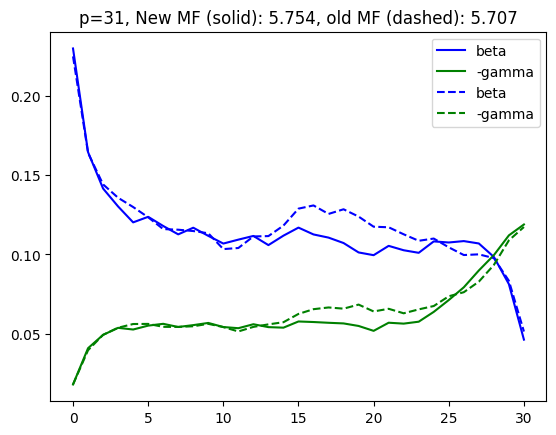

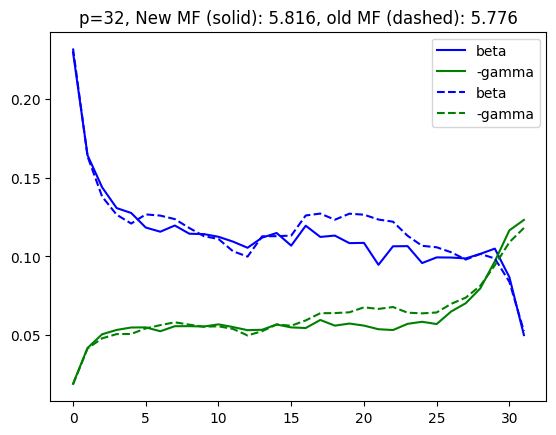

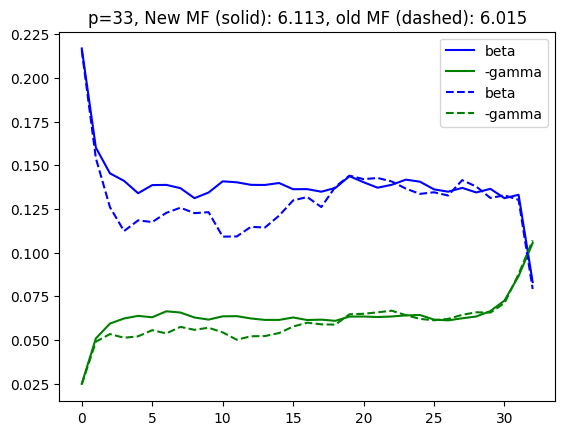

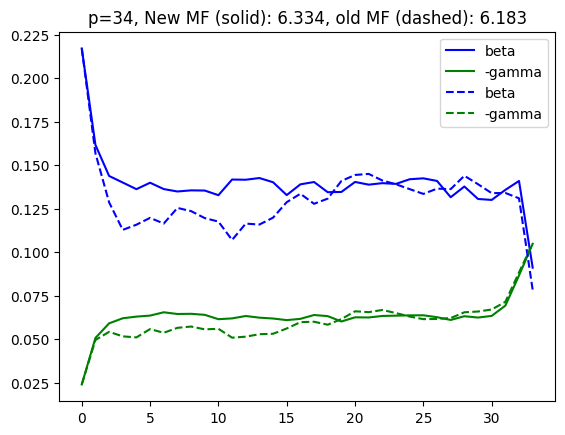

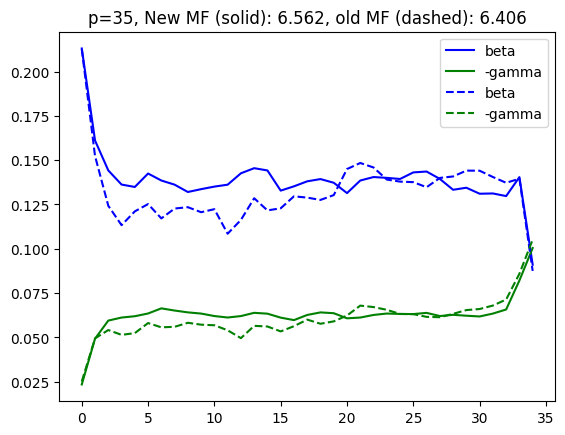

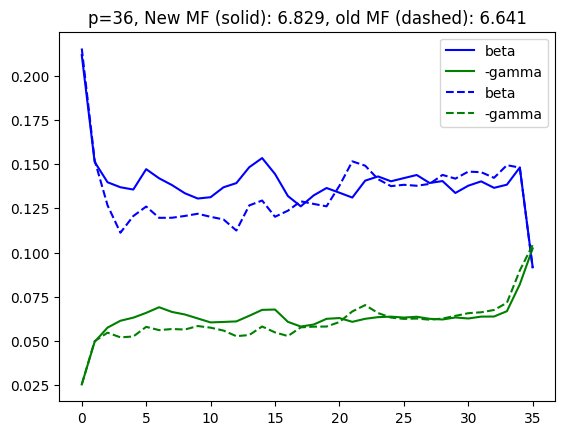

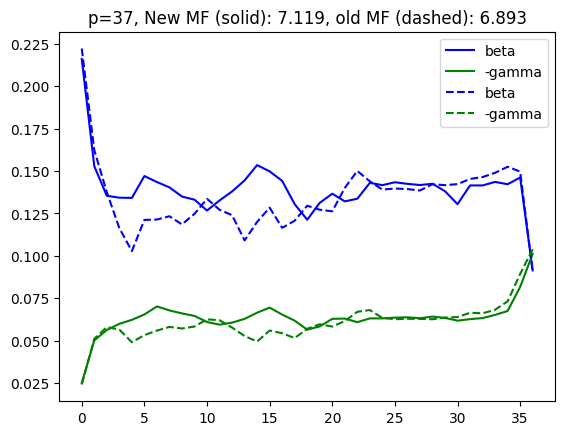

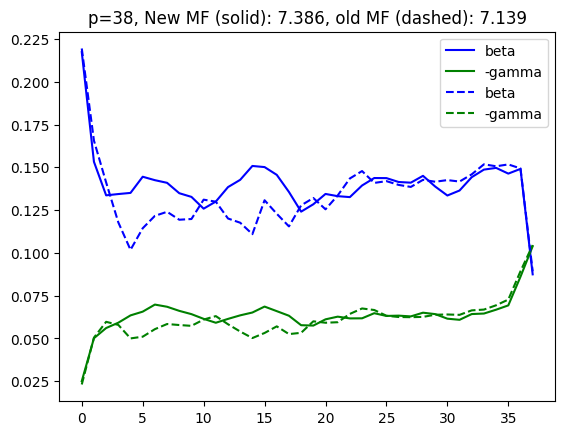

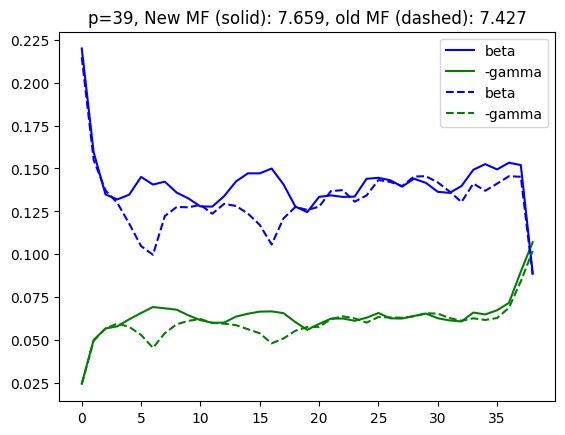

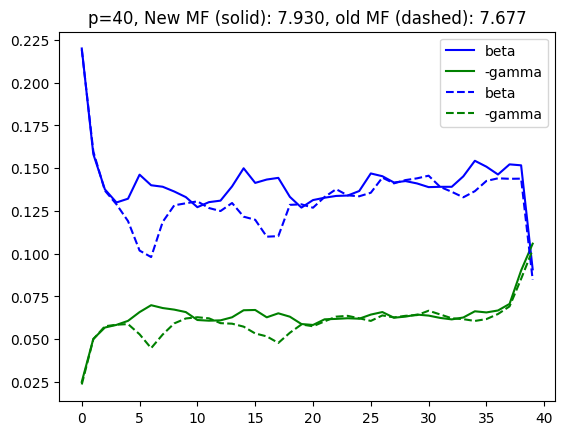

In [301]:
df = get_all_best_known()

import numpy as np

suffix = " opt4MF"
for (_, row1), (_, row2) in zip(
    df2[(df2['N'] == 13) & (df2['p'] > 3)].sort_values('p').iterrows(), df[(df['N'] == 13) & (df['p'] > 3)].sort_values('p').iterrows()
):
# row = df[(df['N'] == 13) & (df['p'] == 12)].squeeze()
# for row1 in [row]:
    if pd.isna(row1['merit factor']) or pd.isna(row2['merit factor'+suffix]):
        continue
    plt.plot(row1['beta'], label='beta', c='b')
    plt.plot(-np.array(row1['gamma']), label='-gamma', c='g')
    if (row2['beta'+suffix][0] - row2['beta'+suffix][-1]) * (row1['beta'][0] - row1['beta'][-1]) < 0:
        # flip sign
        plt.plot(-np.array(row2['beta'+suffix]), label='-beta', c='b', linestyle='dashed')
        plt.plot(np.array(row2['gamma'+suffix]), label='gamma', c='g', linestyle='dashed')
    else:
        plt.plot(row2['beta'+suffix], label='beta', c='b', linestyle='dashed')
        plt.plot(-np.array(row2['gamma'+suffix]), label='-gamma', c='g', linestyle='dashed')
    
    title = f"p={row1['p']}, New MF (solid): {row1['merit factor']:.3f}, old MF (dashed): {row2['merit factor'+suffix]:.3f}"
    plt.title(title)
    plt.legend()
    plt.show()

## How well does the parameter transfer work?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
import sys
sys.path.append("../code/")

from objectives import get_qaoa_labs_objective
from utils import get_all_best_known
df = get_all_best_known()

In [5]:
df['gap'] = 1 - df['overlap opt4MF']

<AxesSubplot: xlabel='p'>

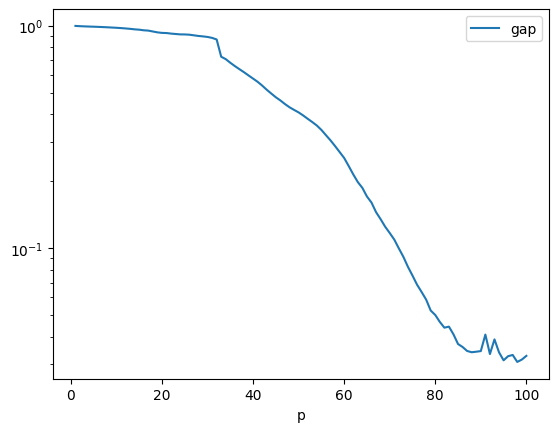

In [43]:
N = 13
df[
    (df['N'] == N)
].sort_values('p').set_index('p')['gap'].plot(legend=True, logy=True)

### Opt4MF vs opt4overlap

<AxesSubplot: xlabel='p'>

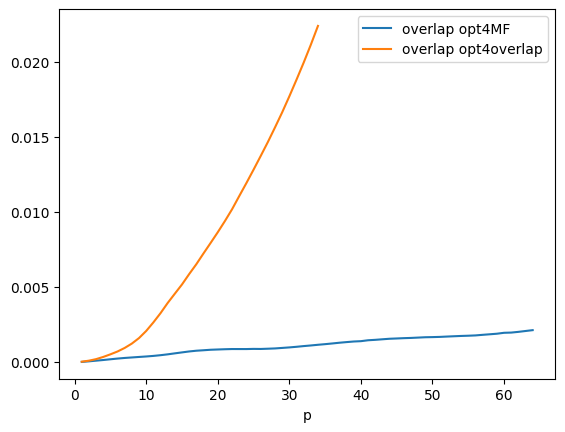

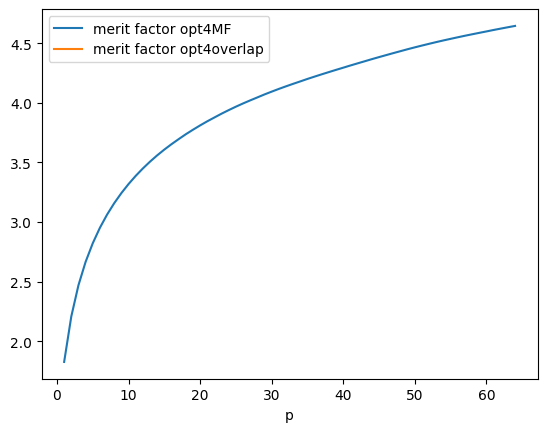

In [54]:
df = get_all_best_known()

N = 24
df[
    (df['N'] == N)
].sort_values('p').set_index('p')[['overlap opt4MF', 'overlap opt4overlap']].plot(legend=True)
df[
    (df['N'] == N)
].sort_values('p').set_index('p')[['merit factor opt4MF', 'merit factor opt4overlap']].plot(legend=True)

## Sanity check: parameters look similar

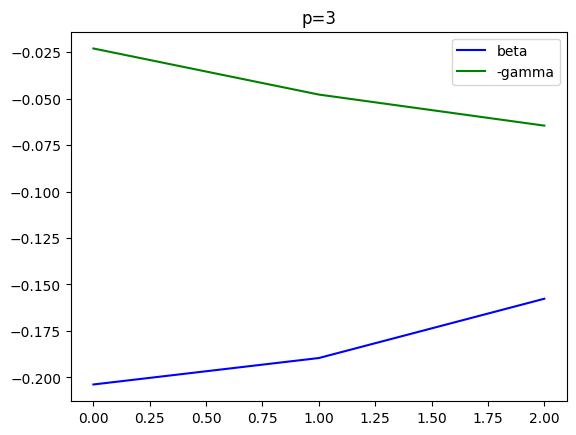

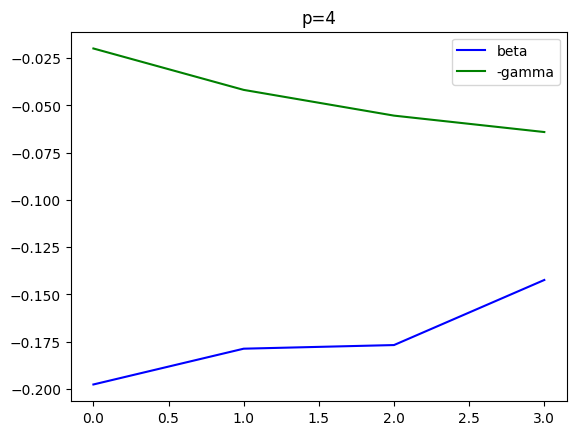

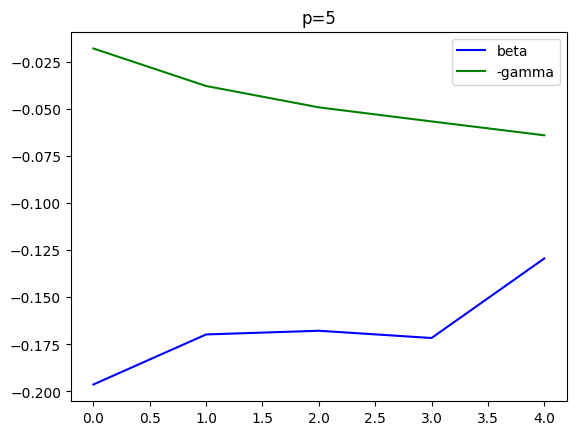

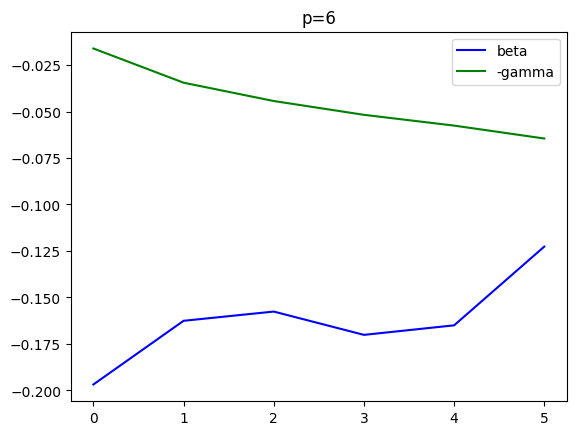

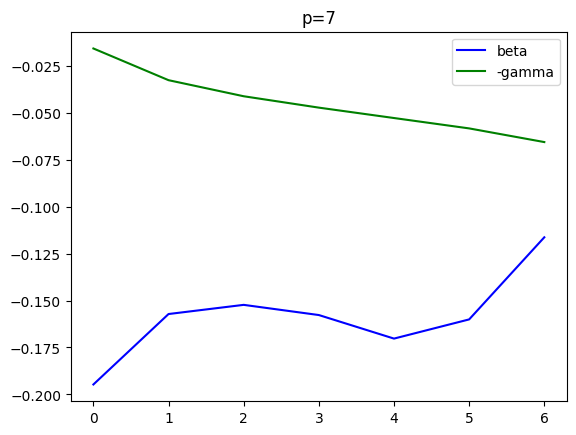

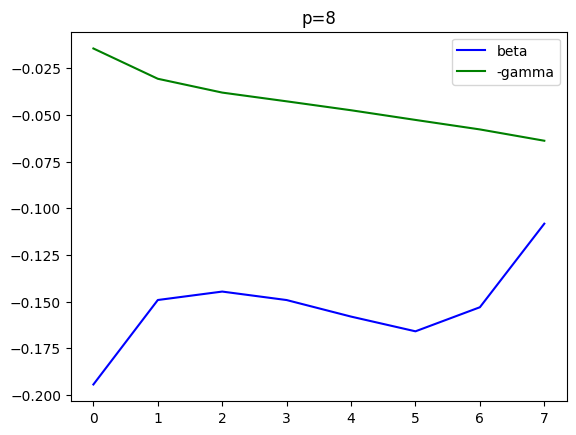

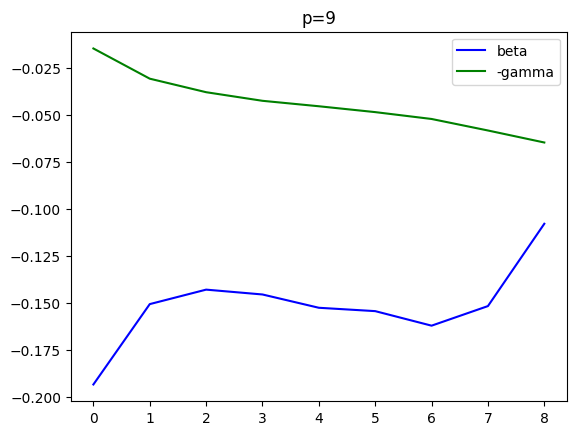

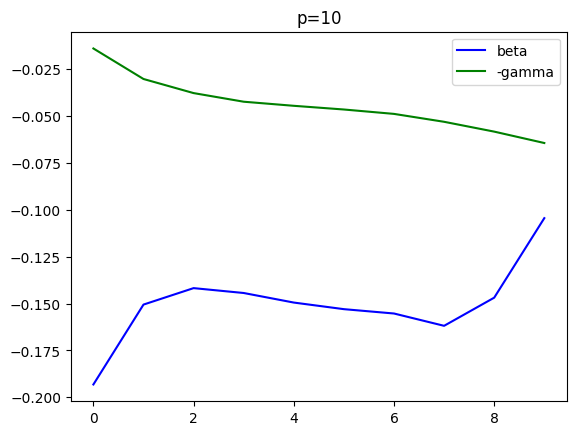

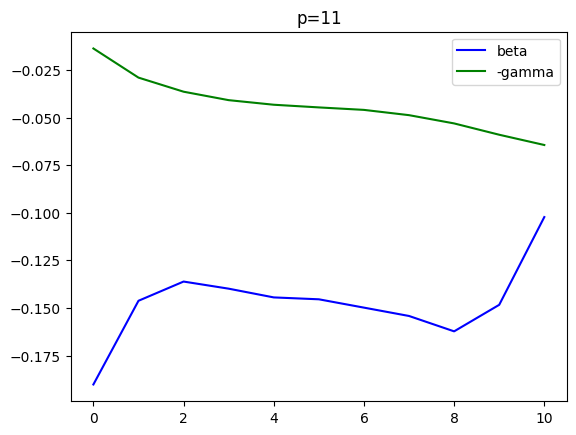

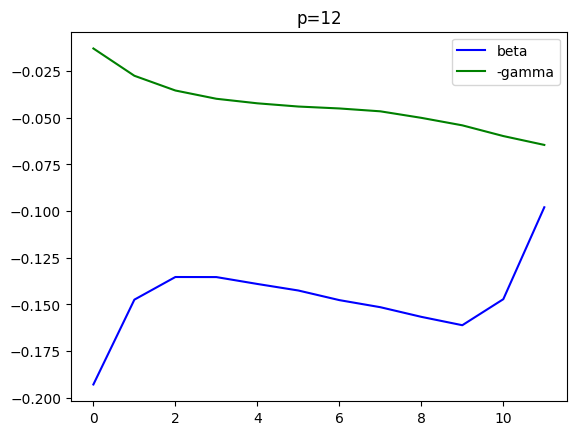

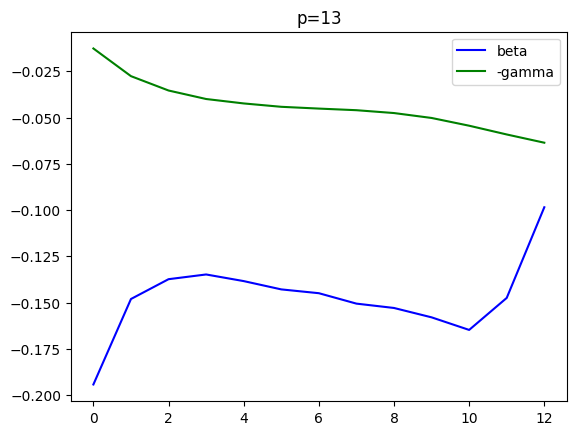

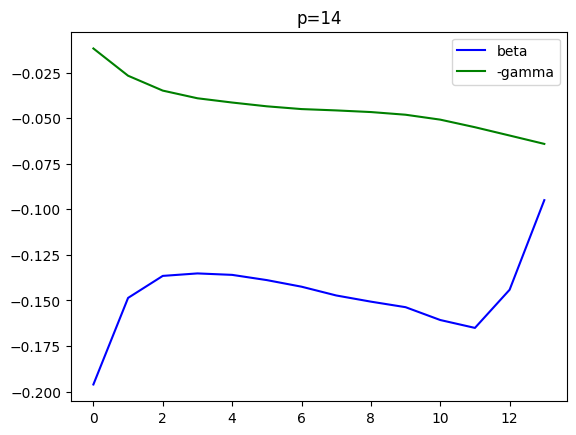

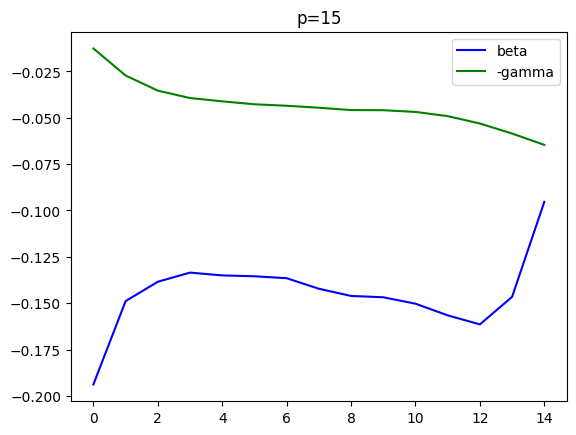

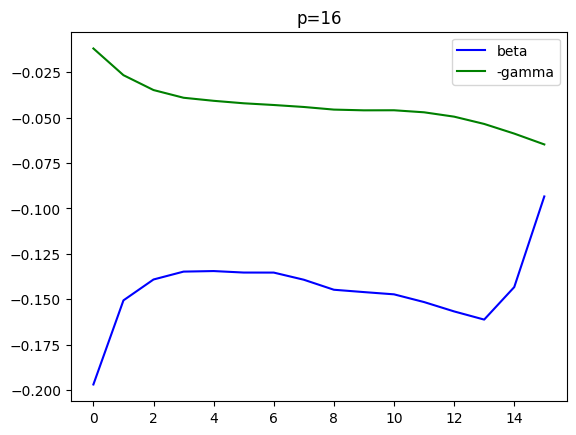

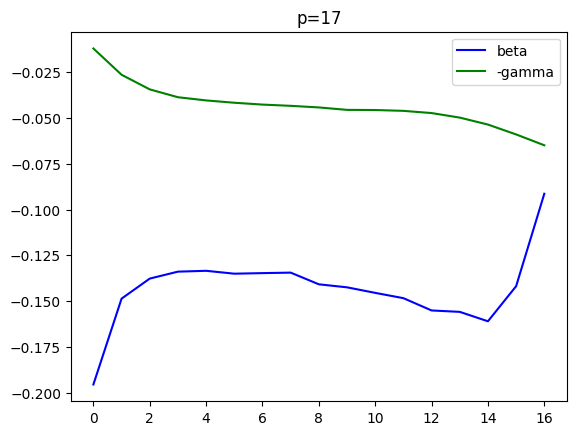

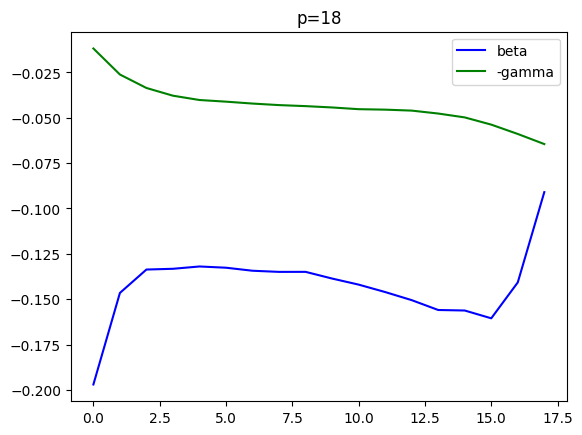

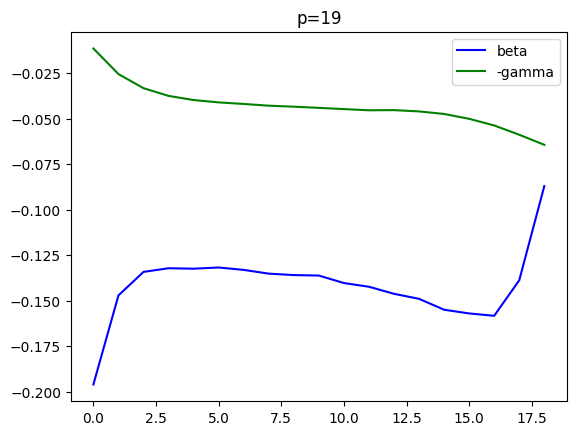

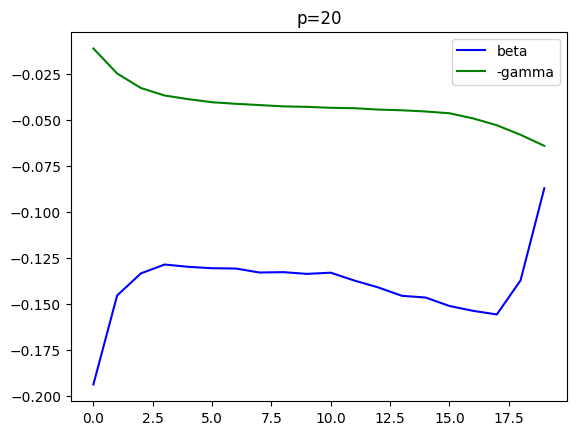

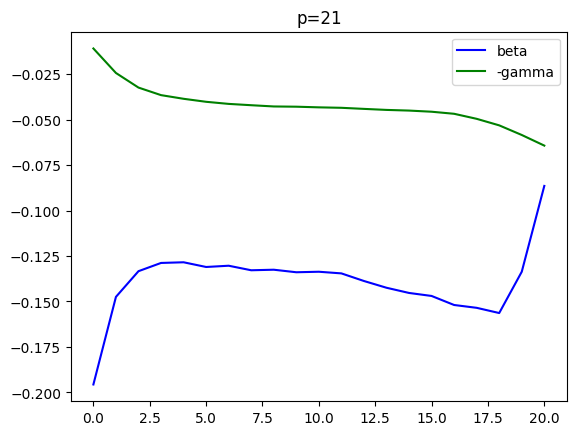

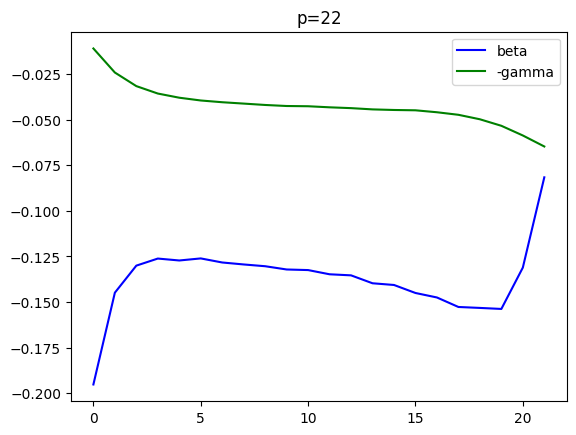

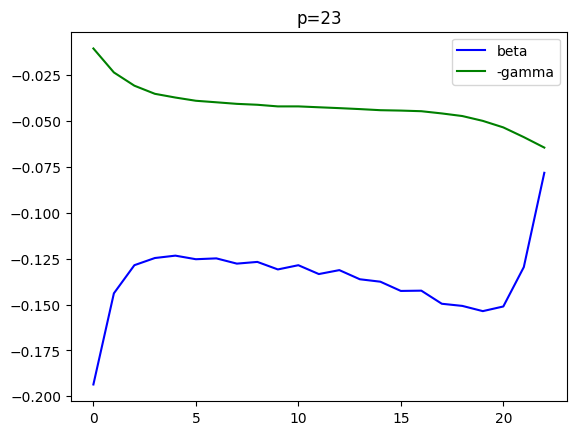

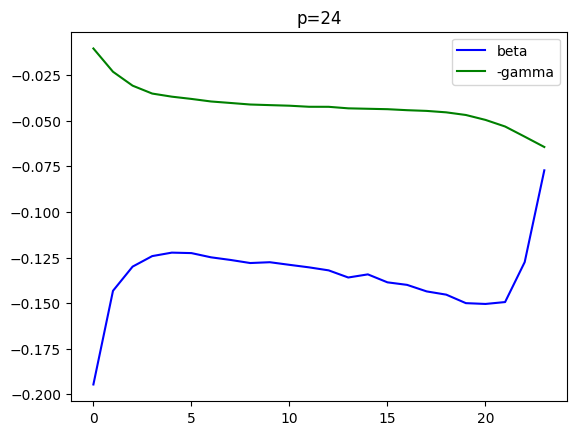

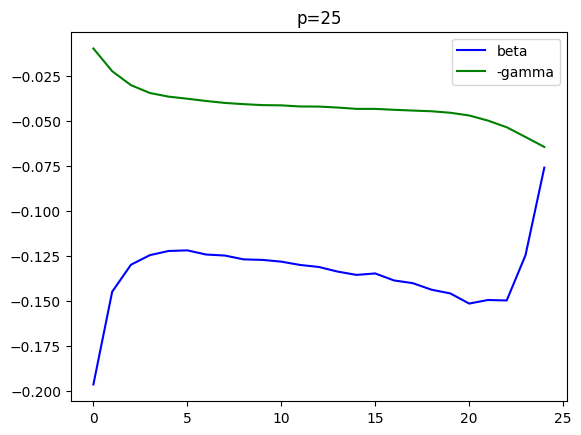

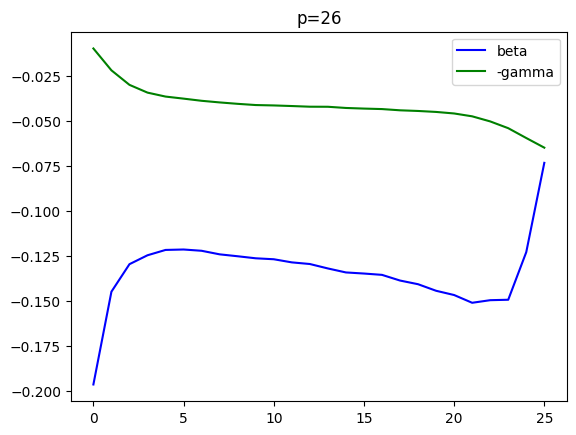

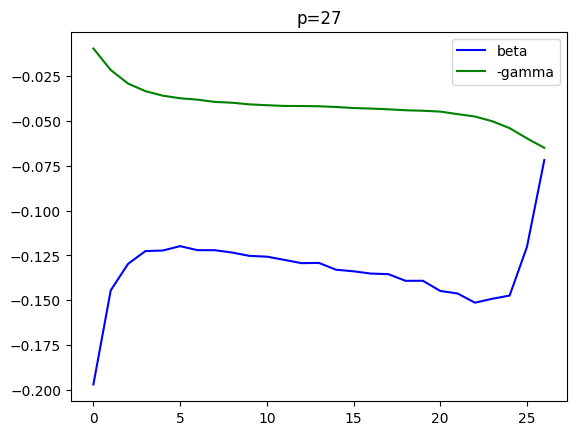

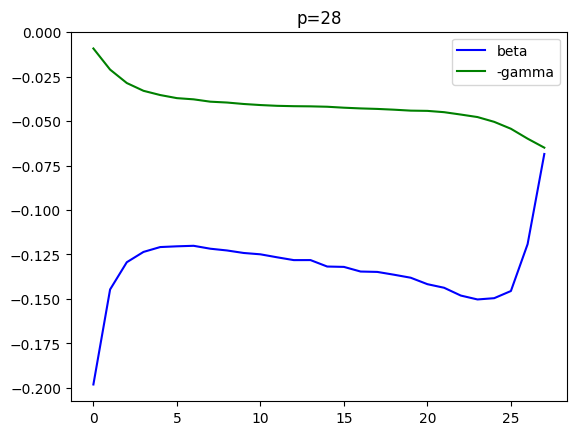

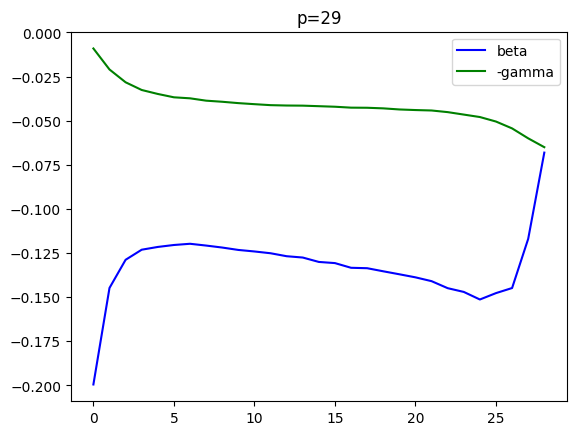

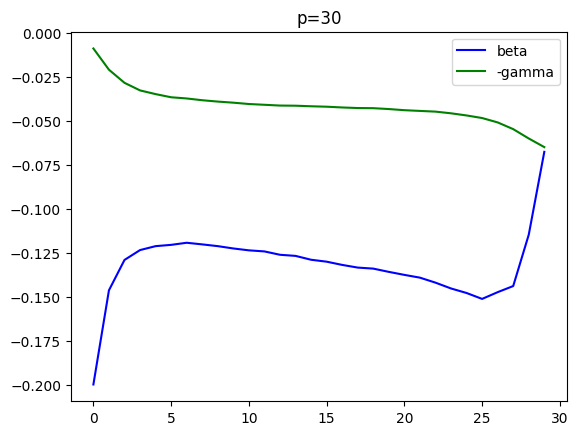

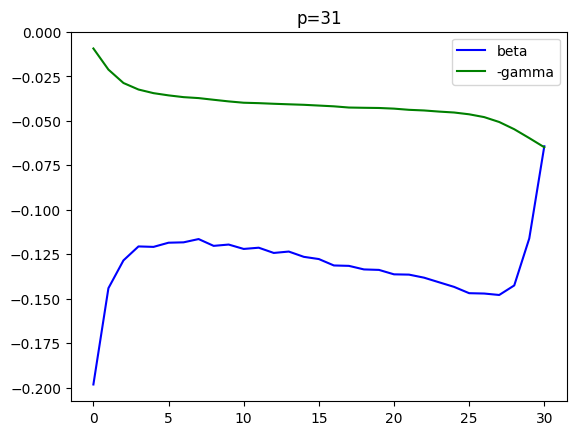

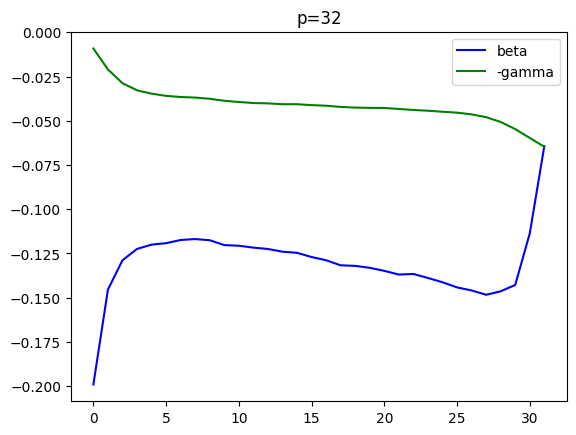

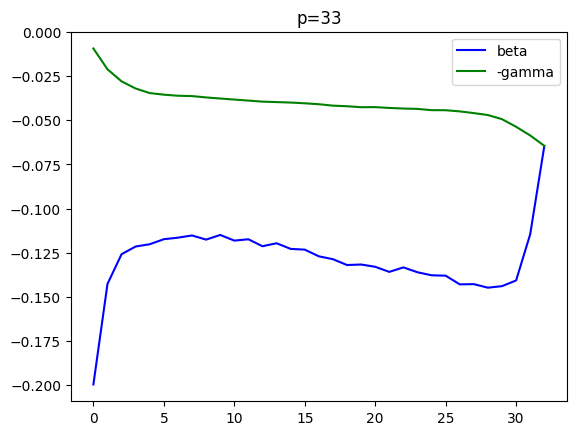

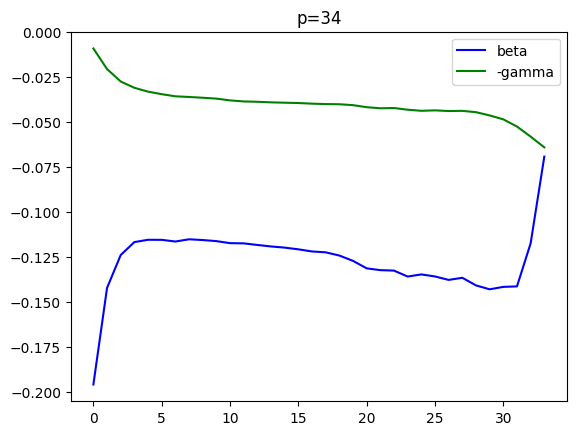

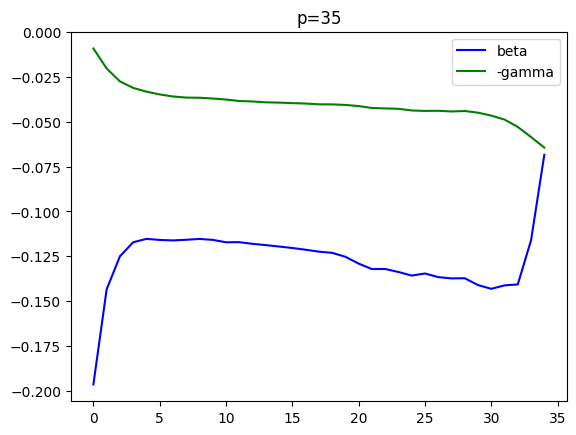

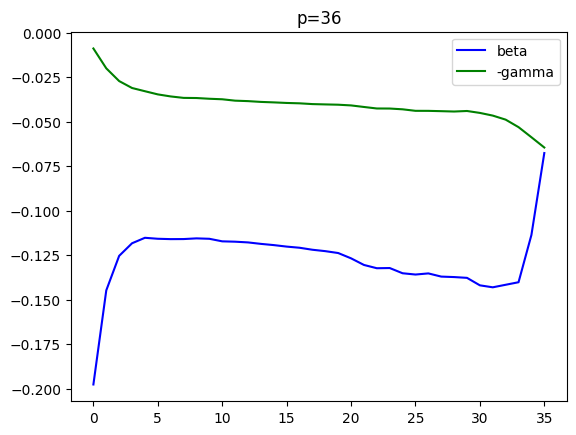

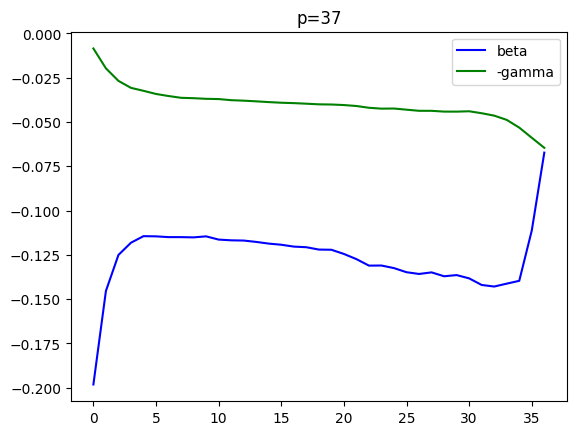

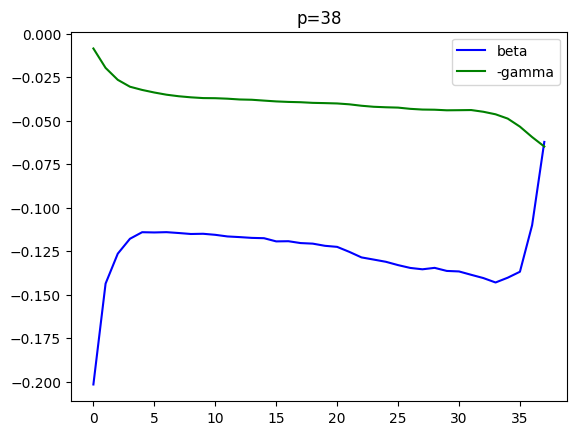

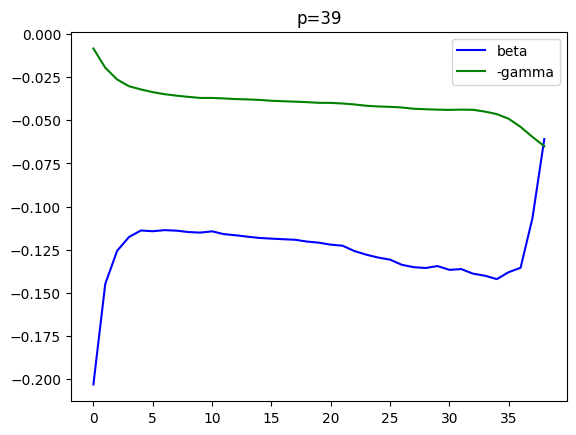

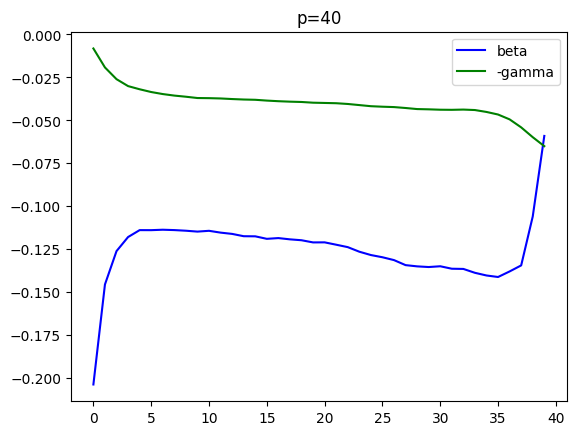

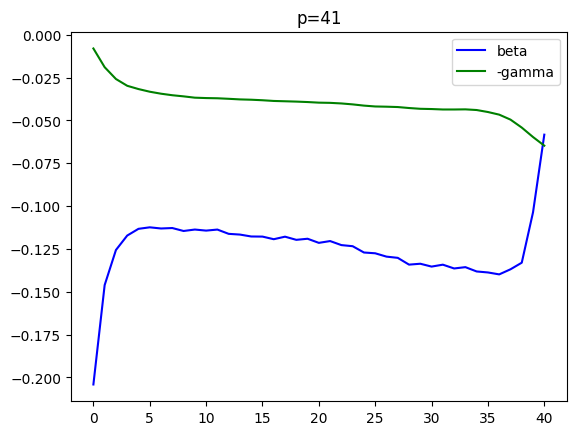

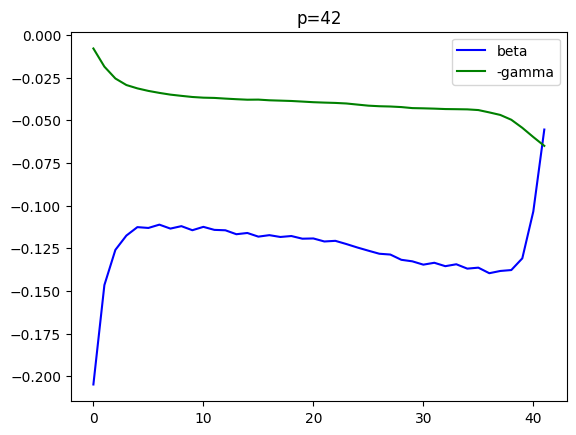

In [144]:
from utils import get_all_best_known
df = get_all_best_known()

# suffix = " opt4MF"
suffix = " opt4overlap"
for _, row1 in df[
    (df['N'] == 23) & (df['p'] >= 3)
].sort_values('p').iterrows():
# row = df[(df['N'] == 13) & (df['p'] == 12)].squeeze()
# for row1 in [row]:
    if pd.isna(row1['overlap'+suffix]):
        continue
    plt.plot(row1['beta'+suffix], label='beta', c='b')
    plt.plot(-np.array(row1['gamma'+suffix]), label='-gamma', c='g')
    plt.title(f"p={row1['p']}")
    plt.legend()
    plt.show()

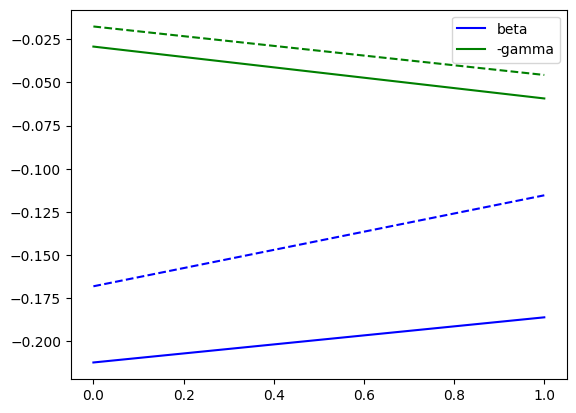

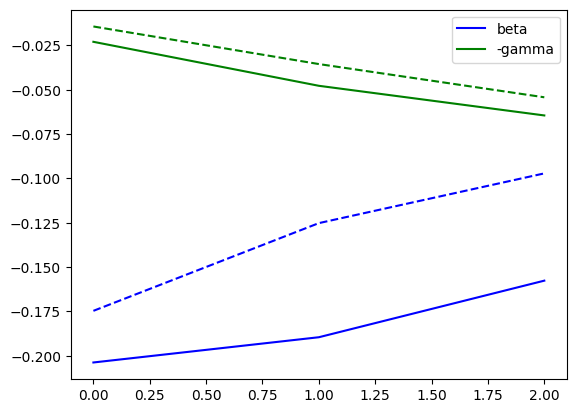

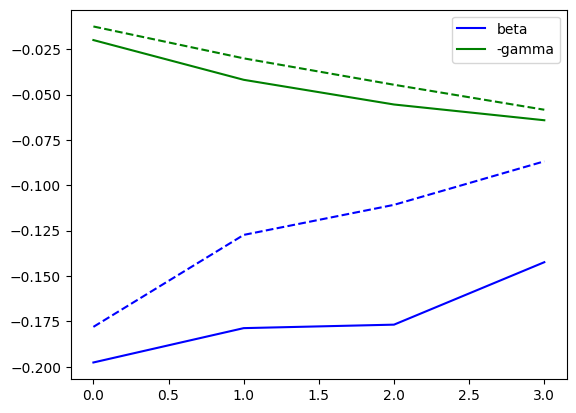

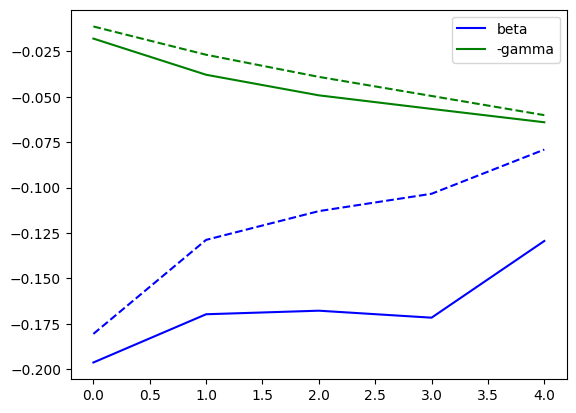

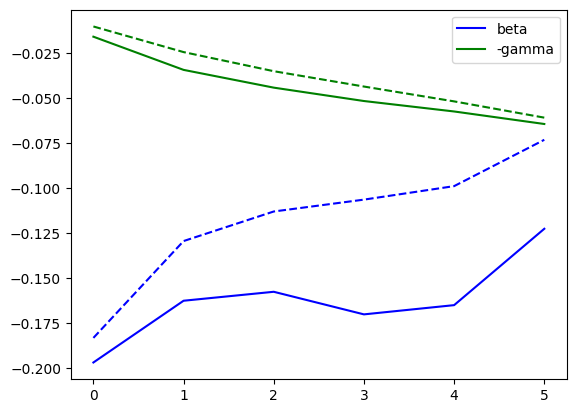

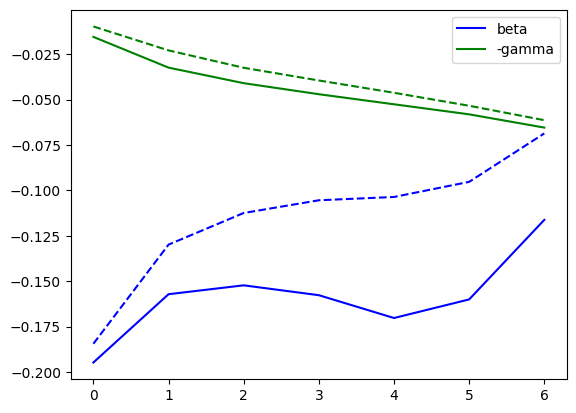

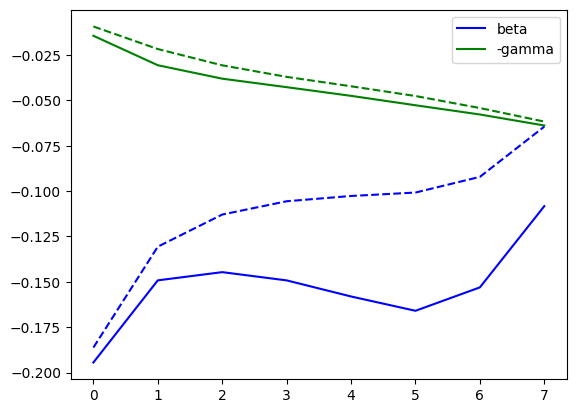

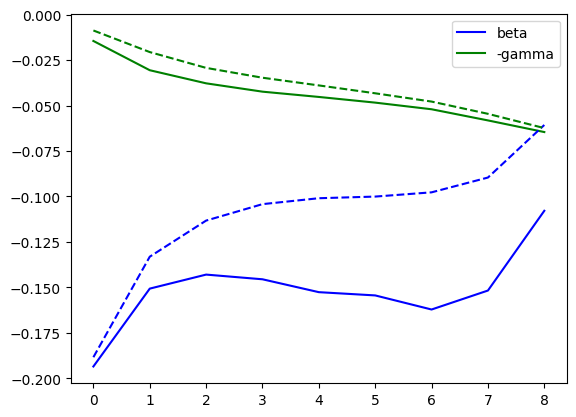

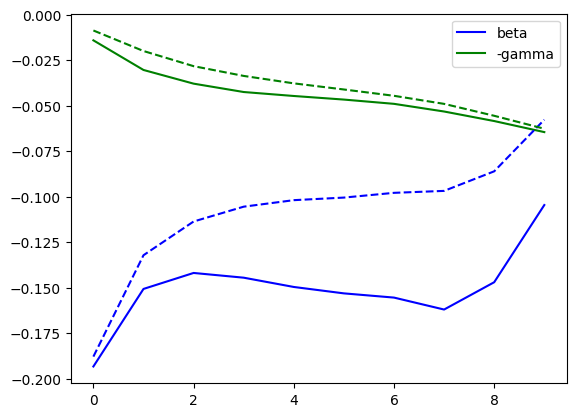

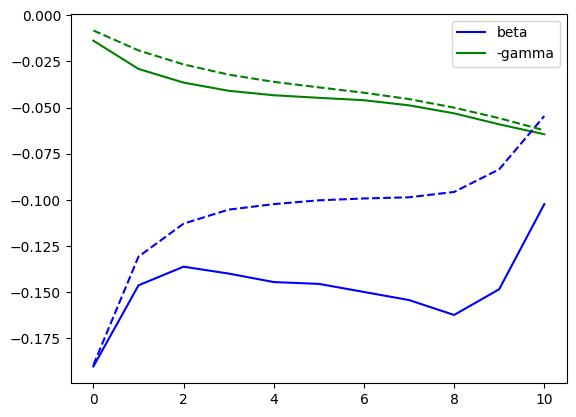

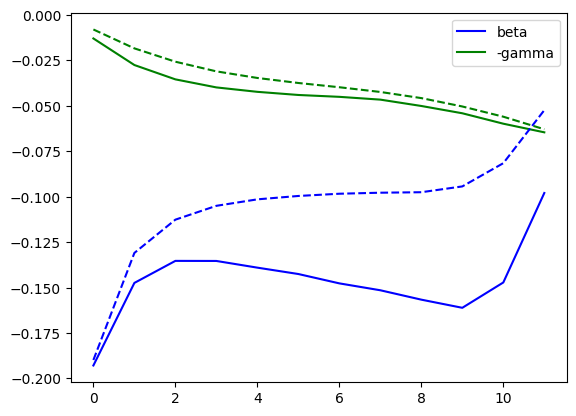

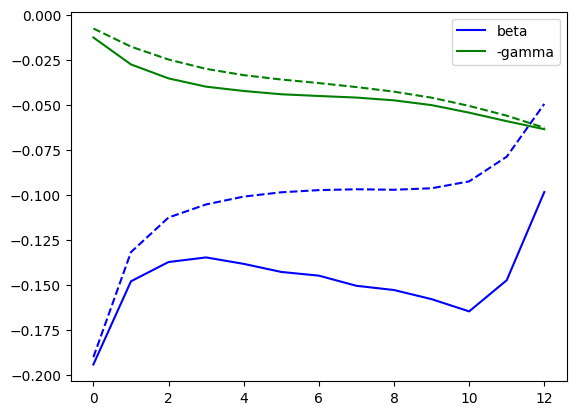

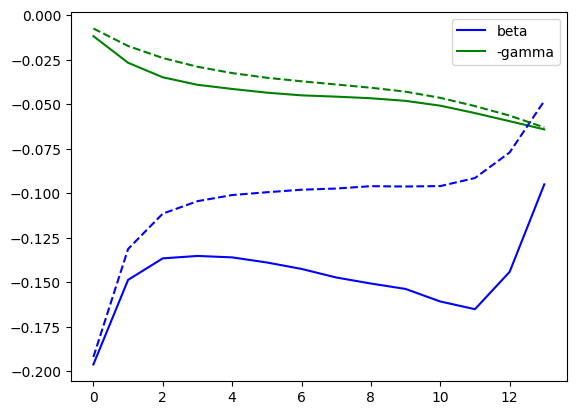

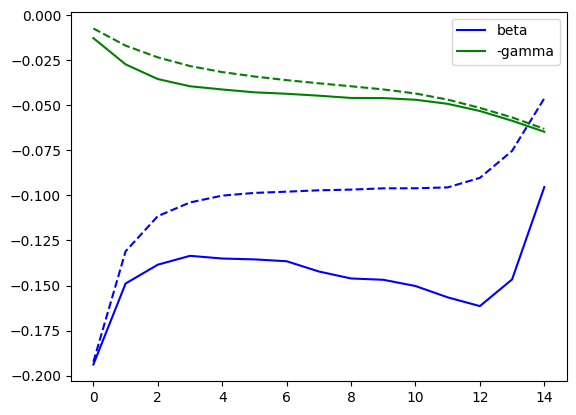

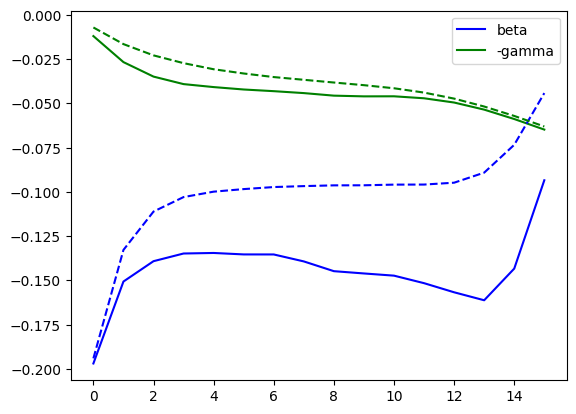

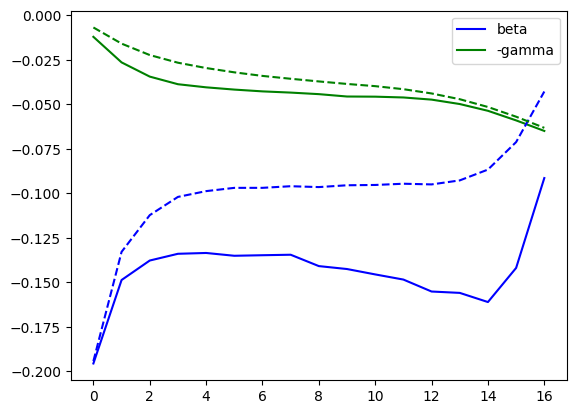

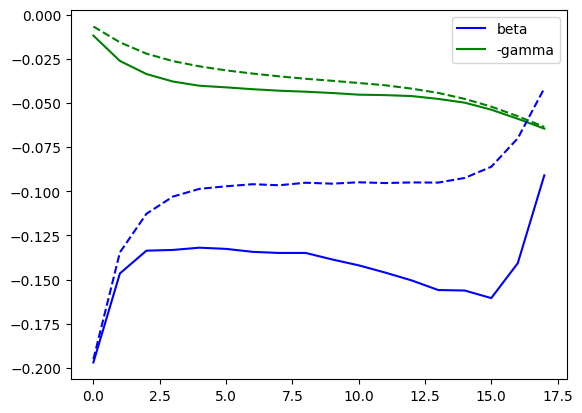

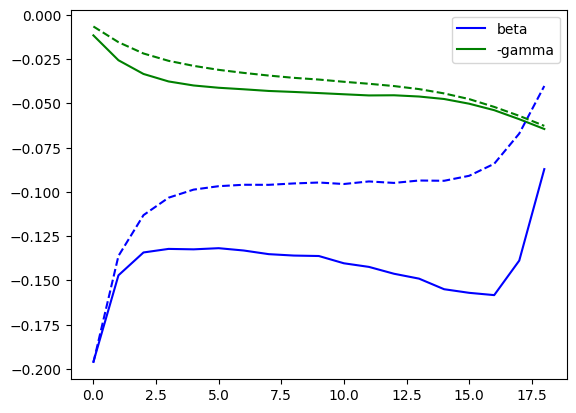

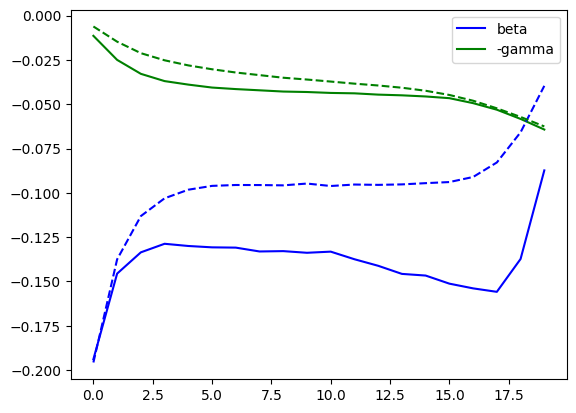

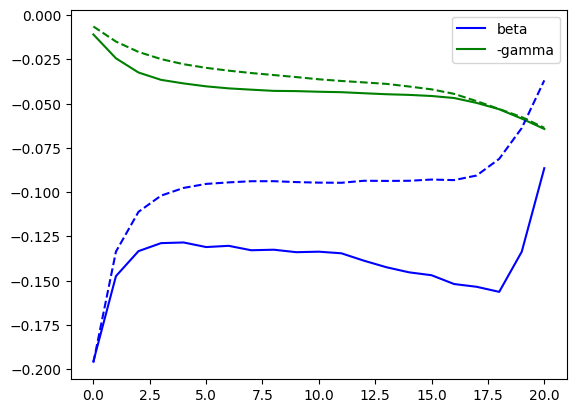

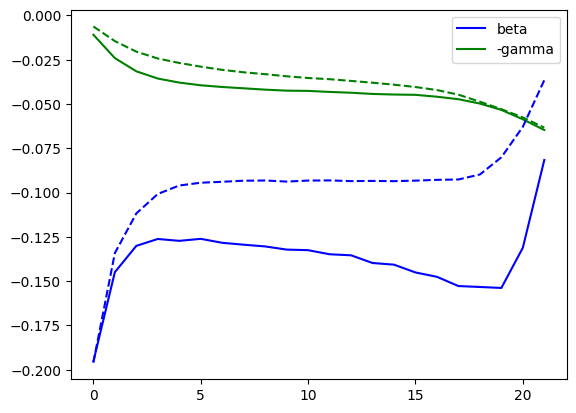

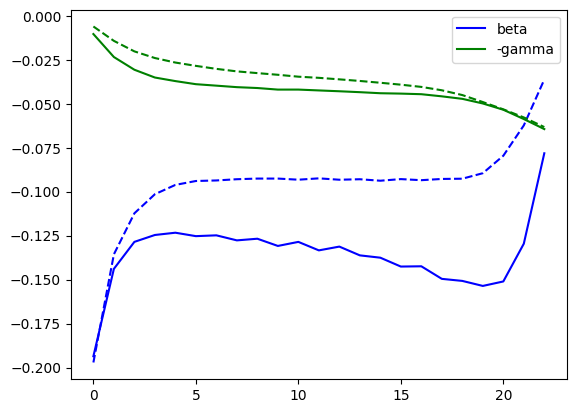

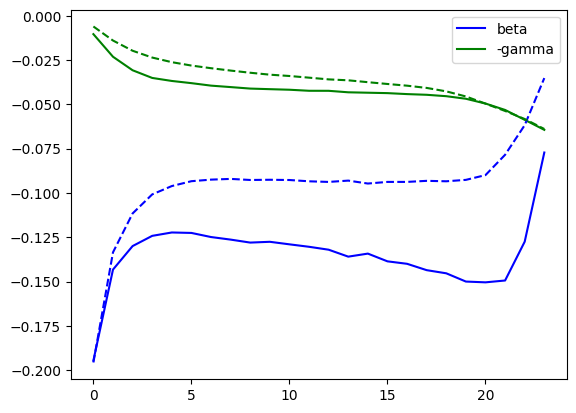

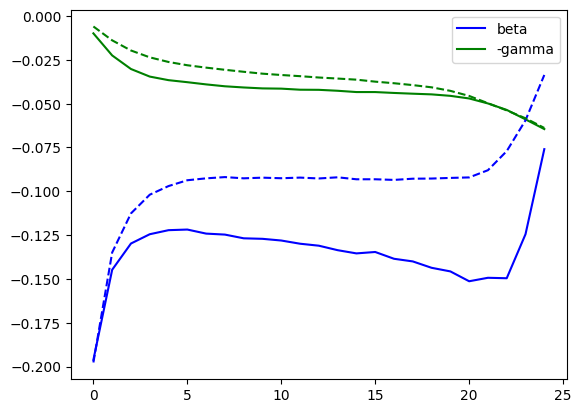

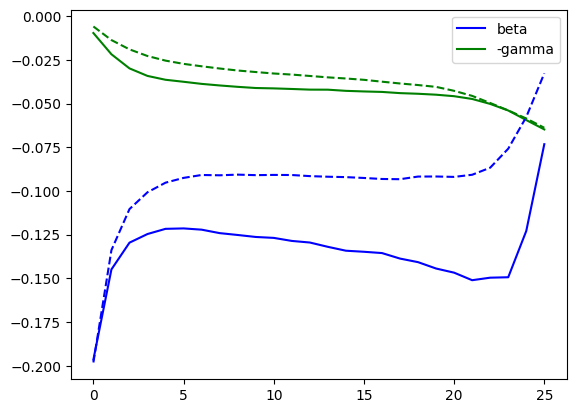

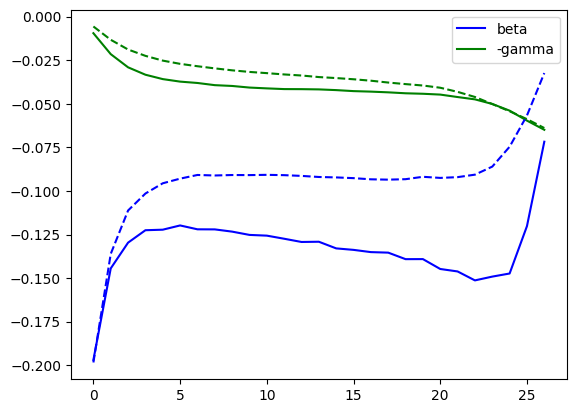

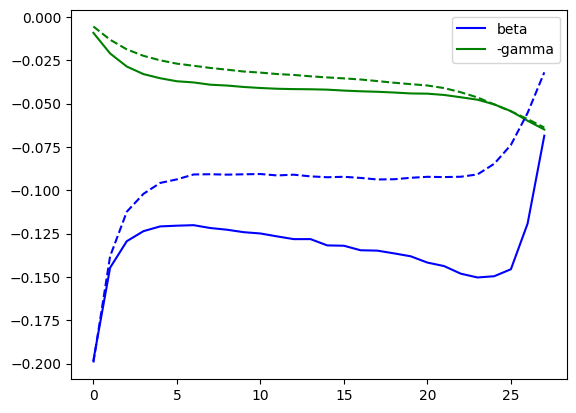

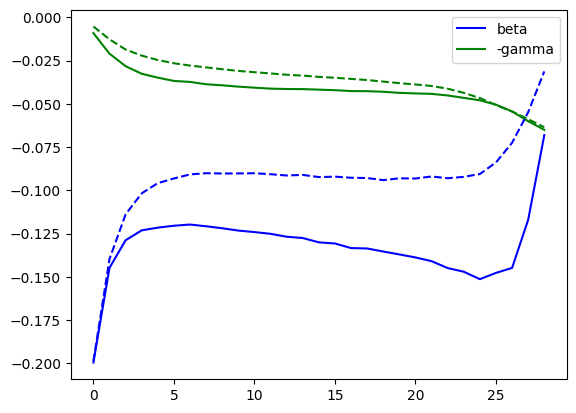

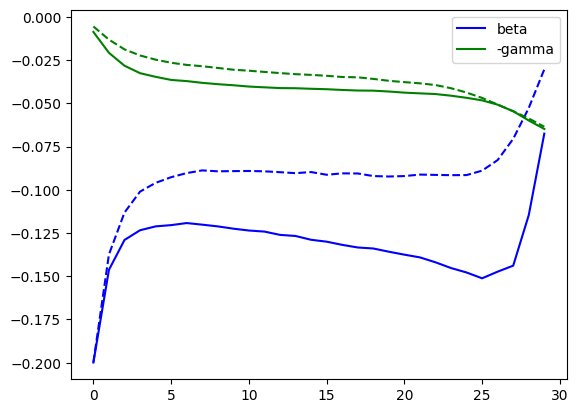

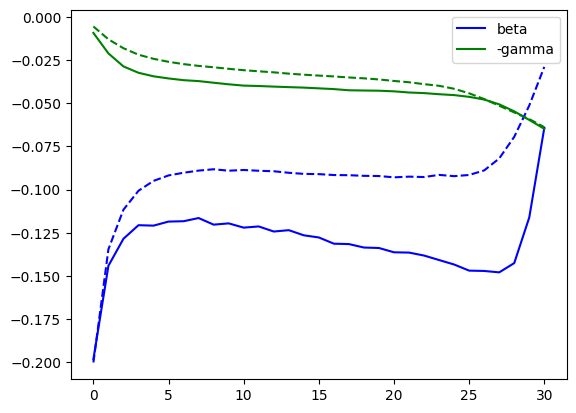

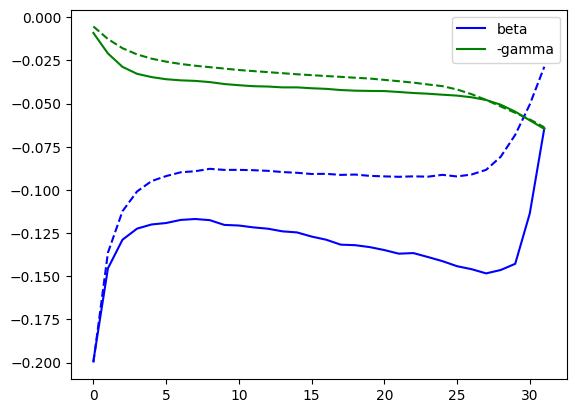

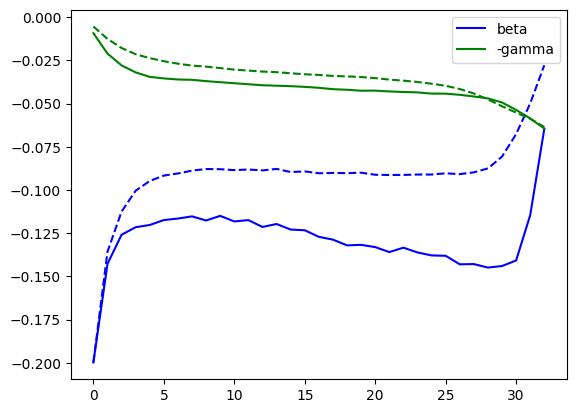

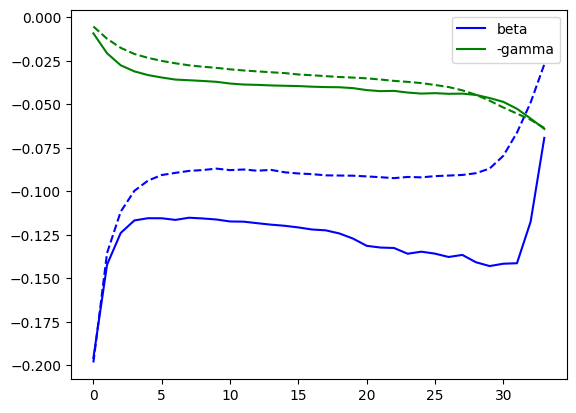

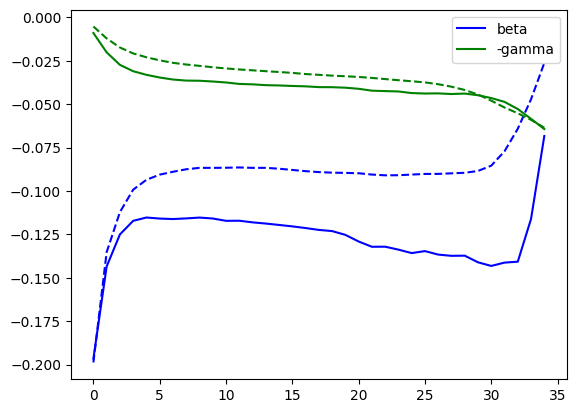

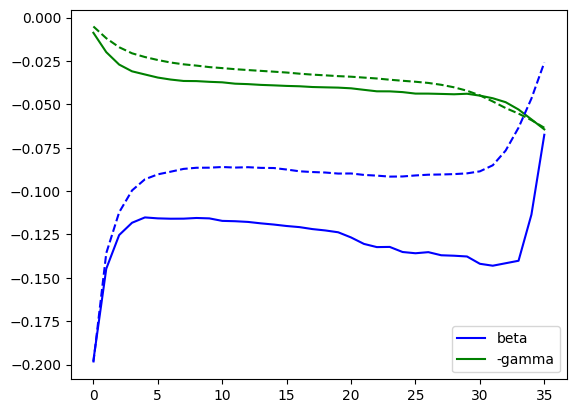

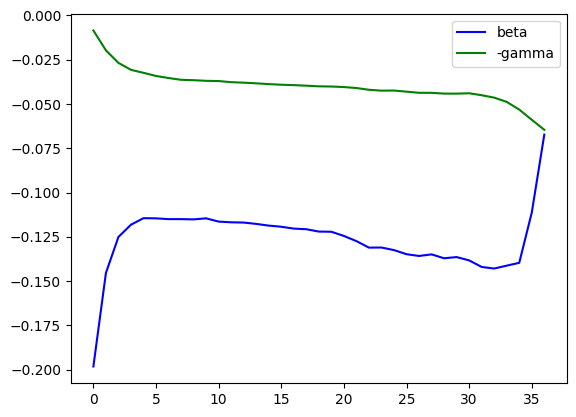

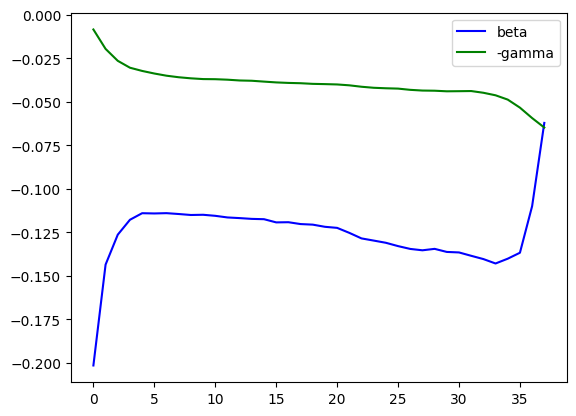

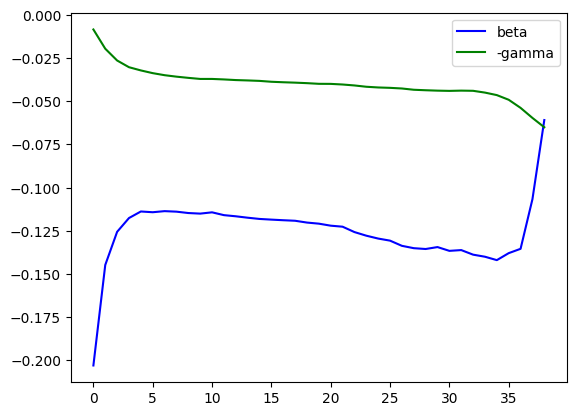

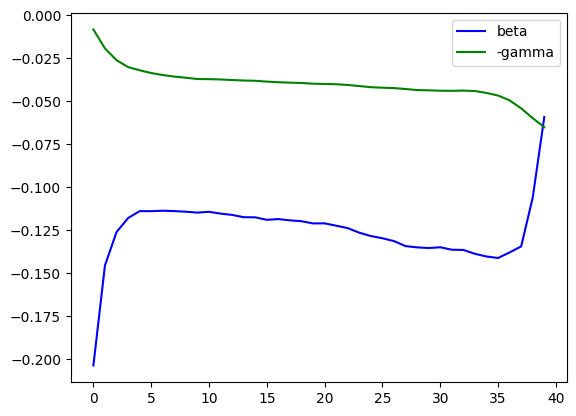

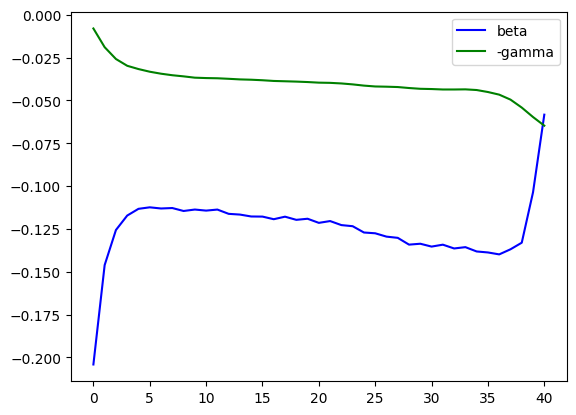

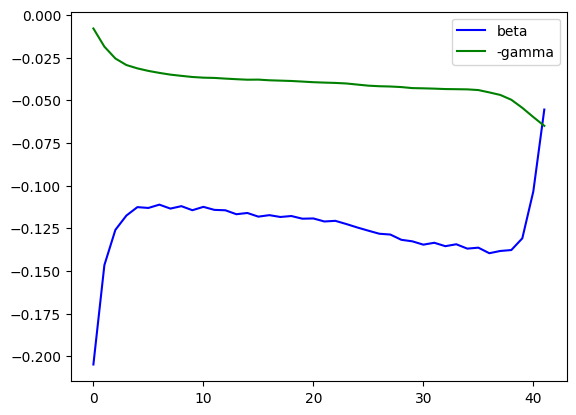

In [168]:
# suffix = " opt4MF"
# suffix = " opt4overlap"
N = 23

tmp = df[(df['N'] == N) & (df['p'] >= 2)]

for _, row in tmp.sort_values('p').iterrows():
    plt.plot(row['beta'+" opt4overlap"], label='beta', c='b')
    plt.plot(-np.array(row['gamma'+" opt4overlap"]), label='-gamma', c='g')
    plt.plot(row['beta'+" opt4MF"], c='b', linestyle='dashed')
    plt.plot(-np.array(row['gamma'+" opt4MF"]), c='g', linestyle='dashed')
    plt.legend()
    plt.show()

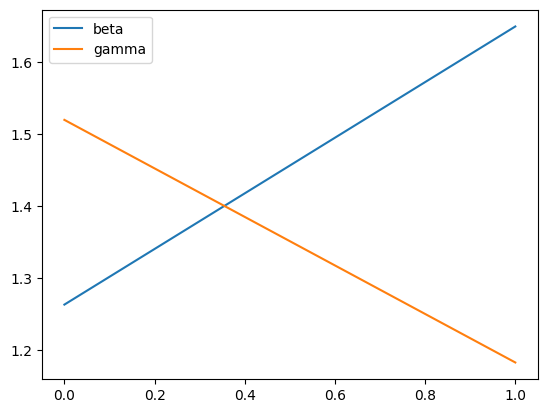

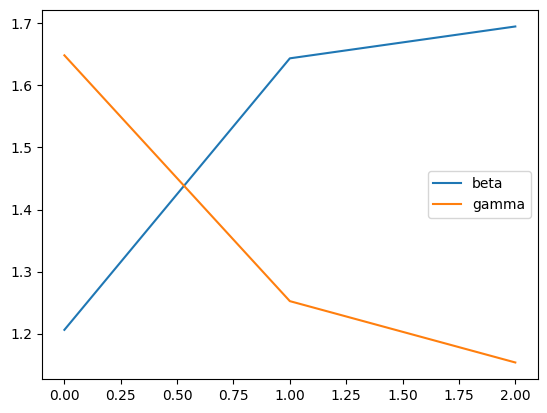

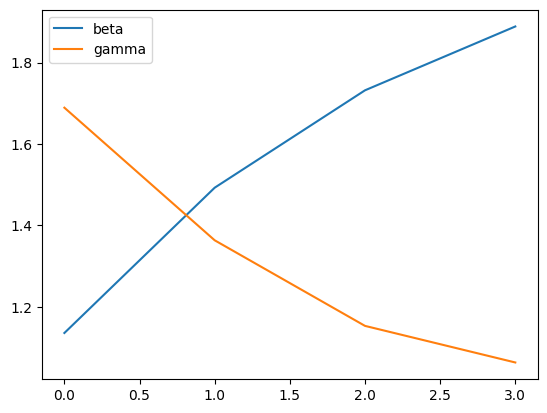

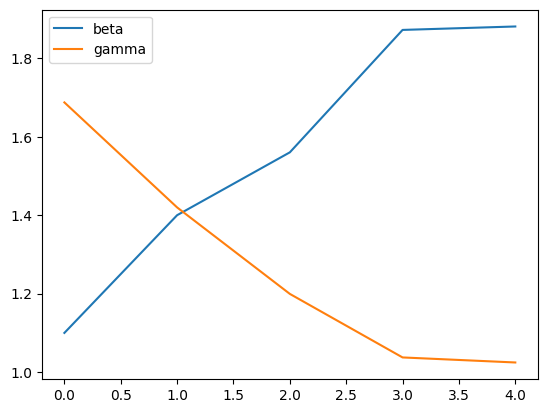

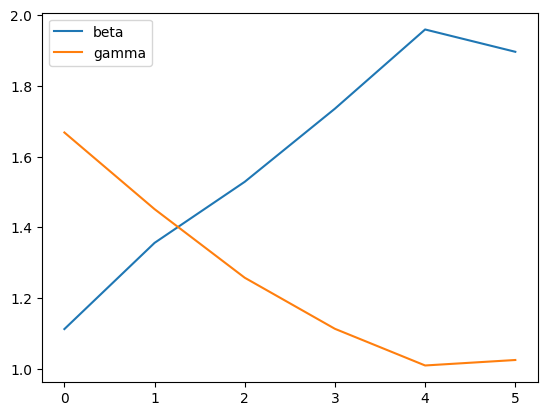

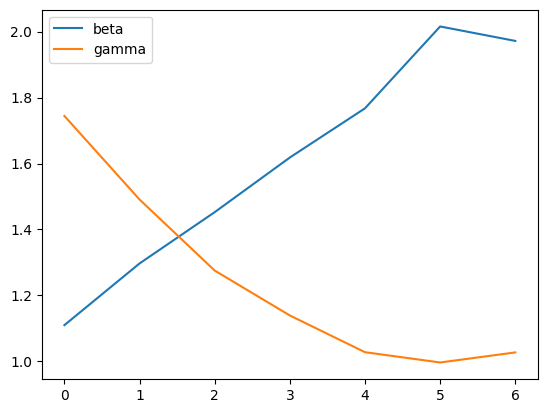

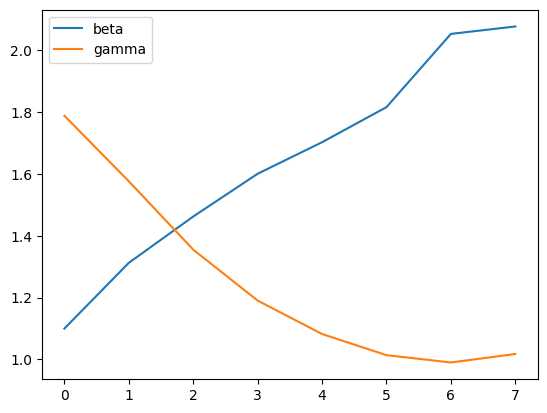

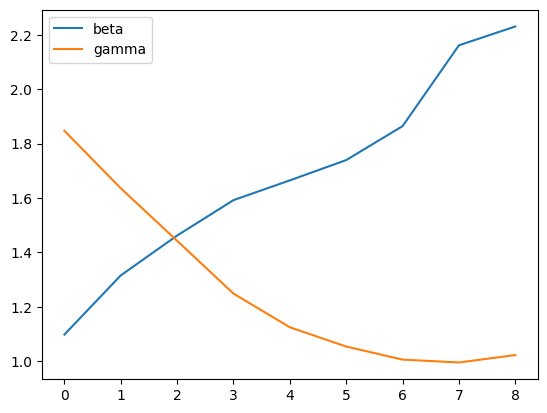

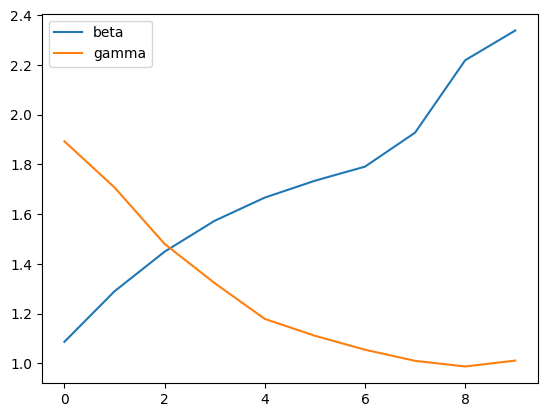

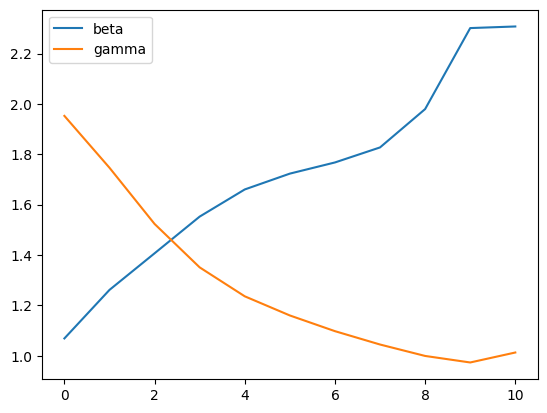

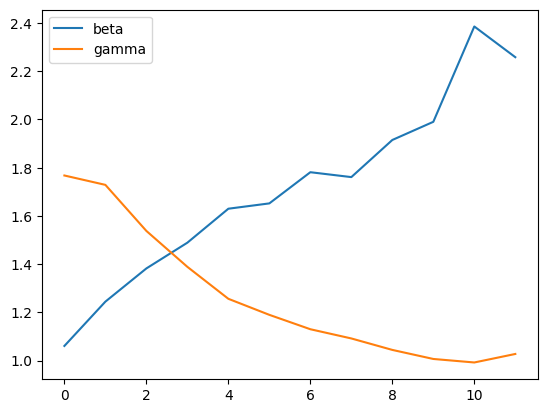

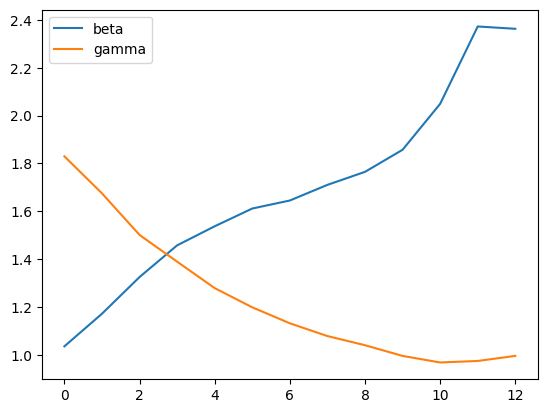

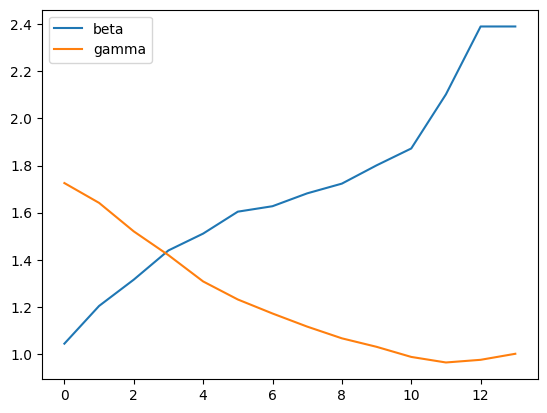

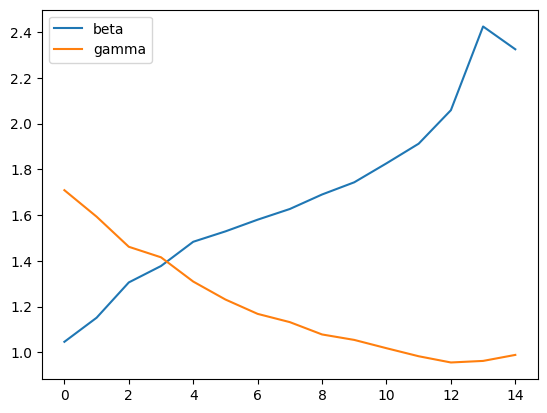

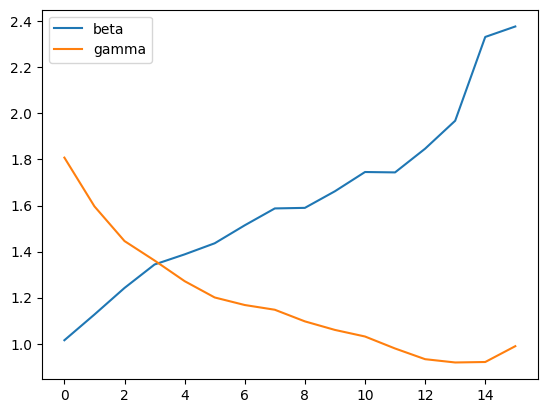

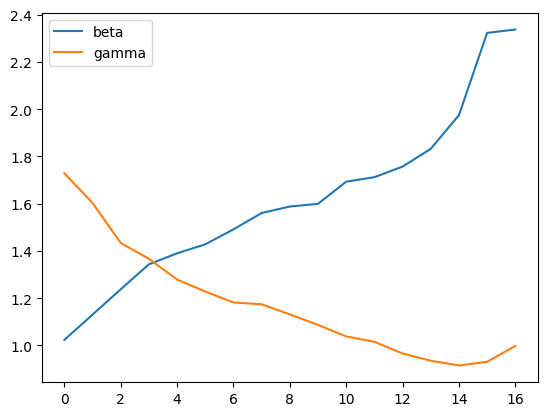

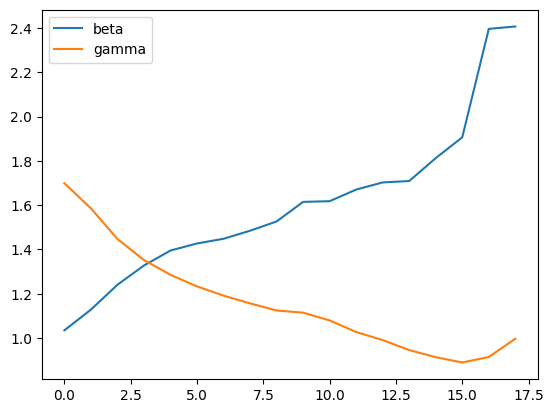

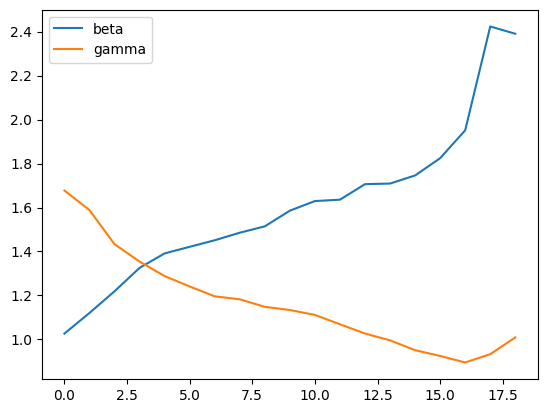

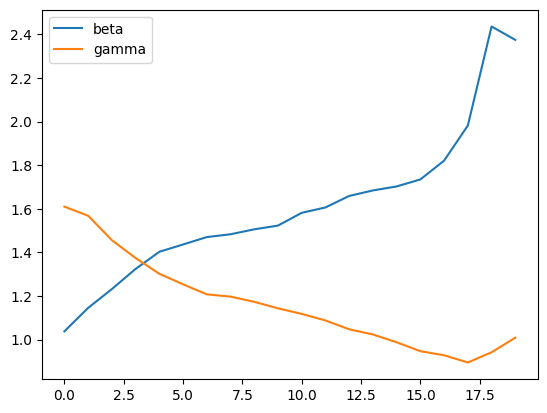

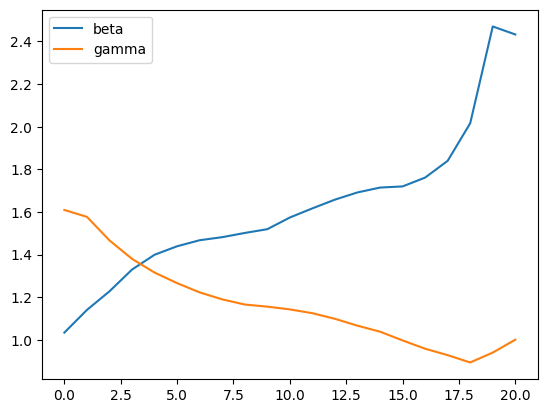

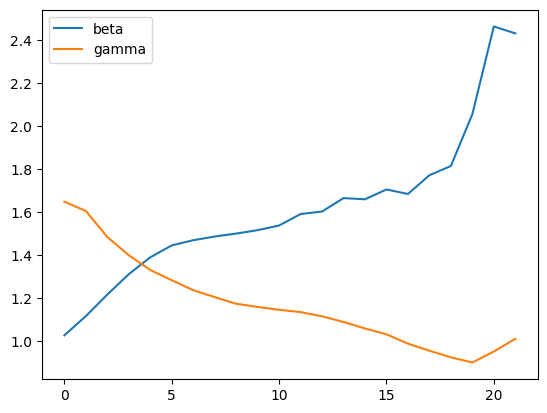

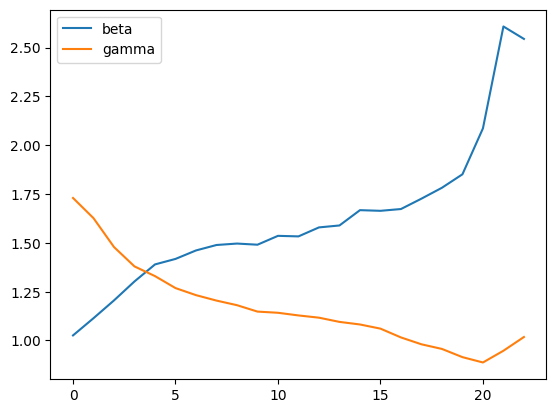

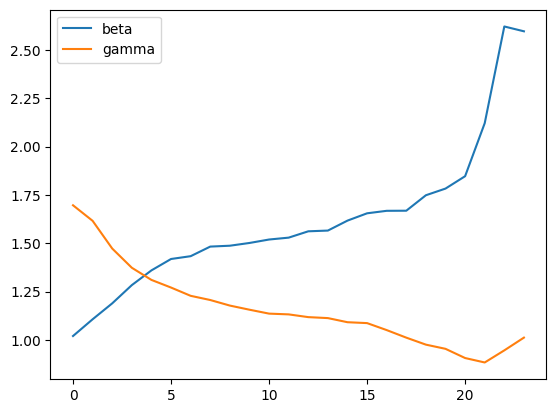

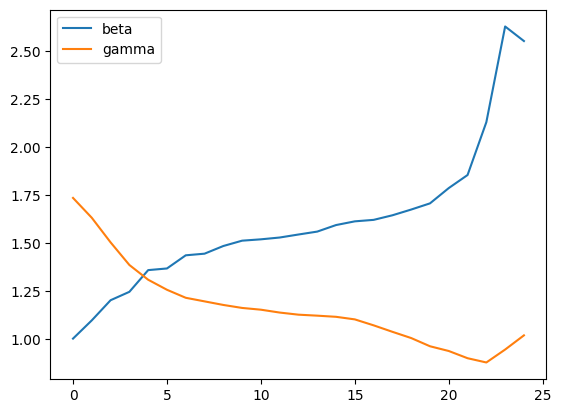

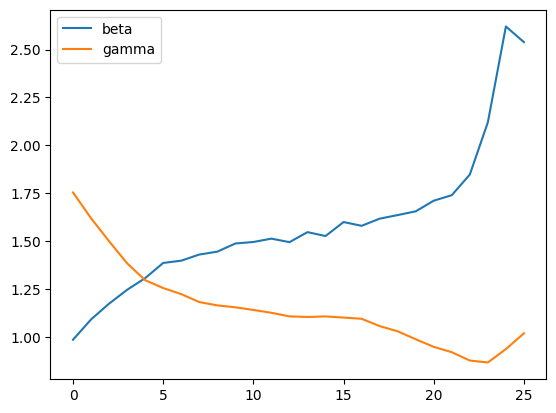

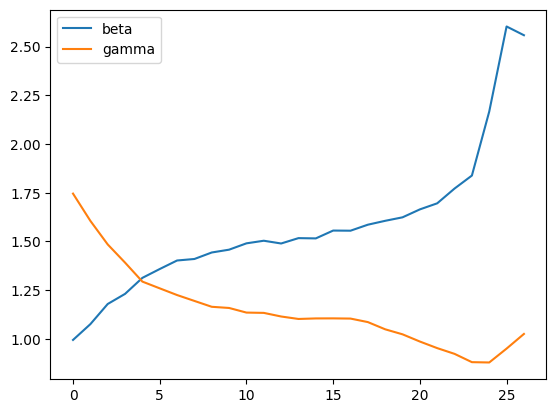

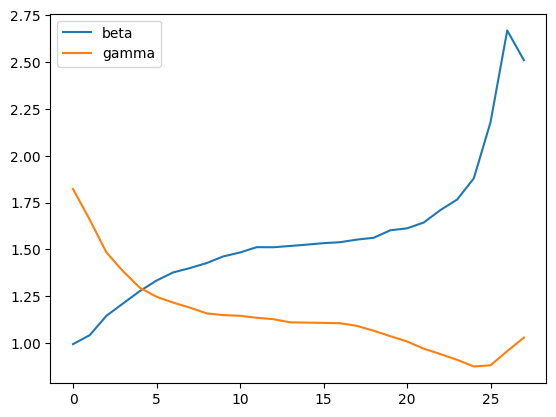

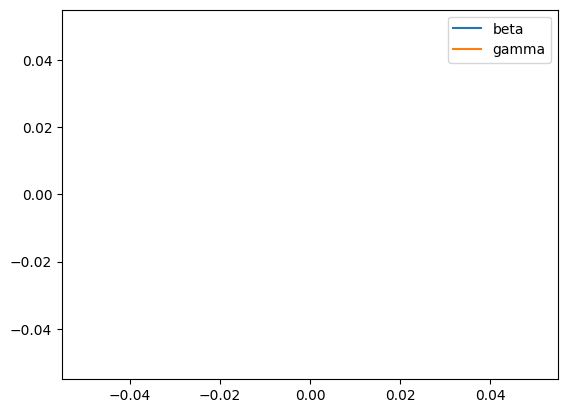

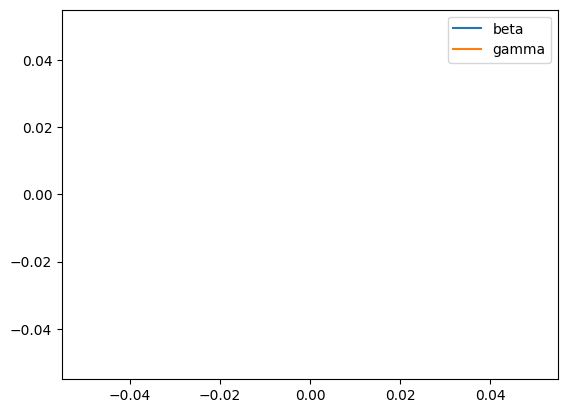

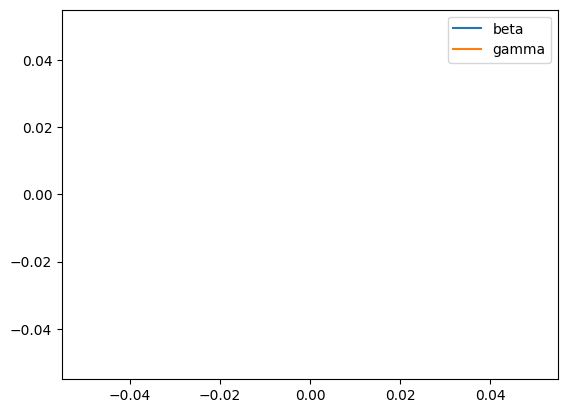

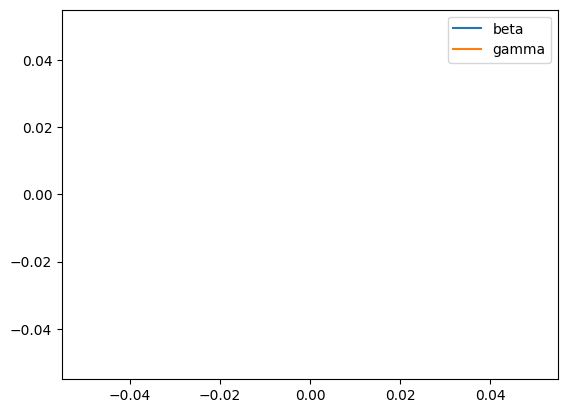

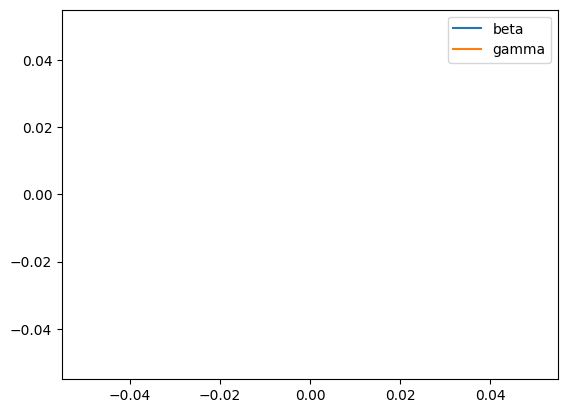

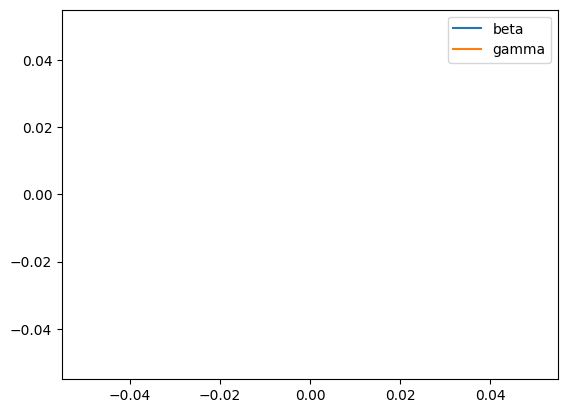

In [170]:
# suffix = " opt4MF"
# suffix = " opt4overlap"
N = 24

tmp = df[(df['N'] == N) & (df['p'] >= 2)]

for _, row in tmp.sort_values('p').iterrows():
    # print("Beta ratios:", np.mean(np.array(row['beta'+" opt4overlap"]) / np.array(row['beta'+" opt4MF"])))
    # print("Gamma ratios:", np.mean(np.array(row['gamma'+" opt4overlap"]) / np.array(row['gamma'+" opt4MF"])))
    plt.plot(np.array(row['beta'+" opt4overlap"]) / np.array(row['beta'+" opt4MF"]), label='beta')
    plt.plot(np.array(row['gamma'+" opt4overlap"]) / np.array(row['gamma'+" opt4MF"]), label='gamma')
    plt.legend()
    plt.show()

## Transfer

Transfer from Fourier:
`f"data/1201_transfer_from_overlap_{N}_{p}_{N_donor}.pickle"`

Transfer from optimizing for MF:
`f"data/1129_transfer_{N}_{p}_{N_donor}.pickle"`

In [2]:
import sys
sys.path.append("../code/")

from labs import true_optimal_mf

In [18]:
from objectives import get_random_guess_merit_factor

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from pathlib import Path
import pickle

def get_df_from_wildcard(wildcard):
    rows = []
    for fname in Path("../scripts/data/").glob(wildcard):
        rows.append(pickle.load(open(fname, "rb")))
    return pd.DataFrame(rows, columns=rows[0].keys())
    
# df_tran_o = get_df_from_wildcard("1201_transfer_from_overlap_*_13.pickle")
df_tran_mf_13_old = get_df_from_wildcard("1129_transfer_*_13.pickle")
# df_tran_mf_14 = get_df_from_wildcard("1129_transfer_*_14.pickle")
# df_tran_mf_15 = get_df_from_wildcard("1129_transfer_*_15.pickle")
df_overlap = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json', orient='index')
df_MF = pd.read_json('../qokit/assets/best_known_QAOA_parameters_wrt_MF.json', orient='index')


df_tran_mf_13 = get_df_from_wildcard("1205_transfer_*_13.pickle")
df_tran_mf_14 = get_df_from_wildcard("1205_transfer_*_14.pickle")
df_tran_mf_15 = get_df_from_wildcard("1205_transfer_*_15.pickle")
df_tran_mf_16 = get_df_from_wildcard("1205_transfer_*_16.pickle")
df_tran_mf_17 = get_df_from_wildcard("1205_transfer_*_17.pickle")
df_tran_mf_18 = get_df_from_wildcard("1205_transfer_*_18.pickle")
df_tran_mf_19 = get_df_from_wildcard("1205_transfer_*_19.pickle")
df_tran_mf_20 = get_df_from_wildcard("1205_transfer_*_20.pickle")

df_tran_mf_13_2 = get_df_from_wildcard("1213_transfer_*_13.pickle")

In [206]:
df_tran_mf_22 = get_df_from_wildcard("1205_transfer_*_22.pickle")

In [208]:
df_tran_overlap_22 = get_df_from_wildcard("0106_transfer_from_overlap_scale_*_22.pickle")

In [209]:
df_tran_overlap_23 = get_df_from_wildcard("0106_transfer_from_overlap_scale_*_23.pickle")

In [207]:
df_tran_batch = get_df_from_wildcard("0113_transfer_from_batch_*.pickle")

### Curiously, overlap keeps going up _even though MF plateaus_

Transfer from 13 seems to be best still?

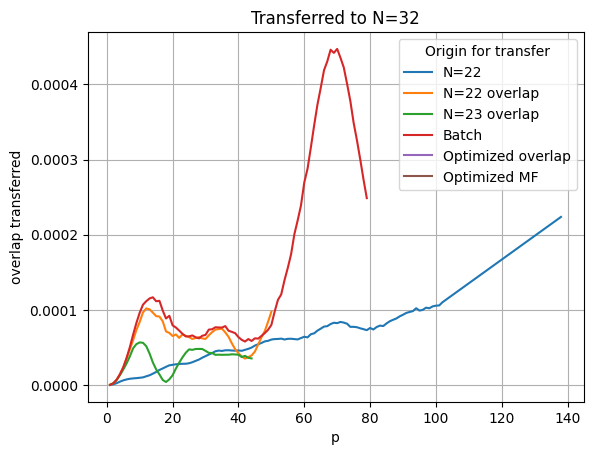

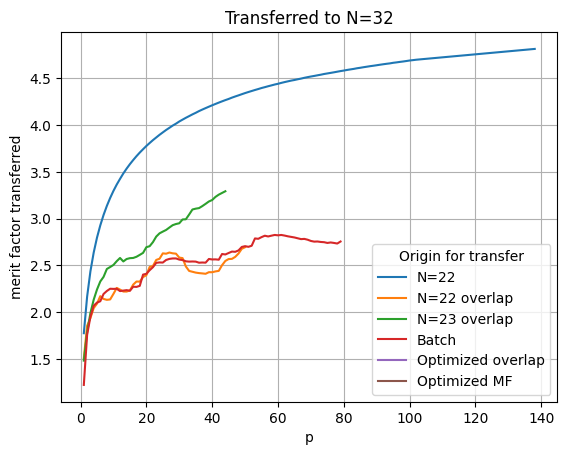

In [216]:
N = 32
max_p = 150
for label_to_plot in ['overlap transferred', 'merit factor transferred']:
    f, ax = plt.subplots()
    for label, df_tran in [
        # ("N=13 cold start only", df_tran_mf_13_old), 
        # ("N=13", df_tran_mf_13), 
        # ("N=13 fourier many seeds", df_tran_mf_13_2),
        # ("N=14", df_tran_mf_14), ("N=15", df_tran_mf_15),
        # ("N=16", df_tran_mf_16), 
        # ("N=17", df_tran_mf_17), 
        # ("N=18", df_tran_mf_18), 
        # ("N=19", df_tran_mf_19), 
        # ("N=20", df_tran_mf_20),
        ("N=22", df_tran_mf_22),  
        ("N=22 overlap", df_tran_overlap_22),  
        ("N=23 overlap", df_tran_overlap_23),  
        ("Batch", df_tran_batch),  
        ("Optimized overlap", df_overlap), 
        ("Optimized MF", df_MF),
    ]:
        if 'Optimized' in label:
            label_to_plot_processed = " ".join(label_to_plot.split(" ")[:-1])
        else:
            label_to_plot_processed = label_to_plot
        df_tran[(df_tran['N'] == N) & (df_tran['p'] < max_p)].sort_values('p').set_index('p')[label_to_plot_processed].plot(legend=True, ax=ax, label=label)
        
        plt.legend(title="Origin for transfer")
    plt.title(f"Transferred to N={N}")
    ax.set_ylabel(label_to_plot)
    plt.grid()
    plt.show()

15 89 0.7530916510284689
16 32 0.11933587458372485
17 56 0.07809395065894242
18 91 0.7251103380217849
19 91 0.48816704651489906
20 91 0.13009884359462698
21 36 0.007262784607895978
22 91 0.3526342024903364
23 33 0.015901894453304033
24 91 0.006609283896075624
25 72 0.004311052085664069
26 36 0.009784276839305273
27 88 0.0004323428292591913
28 74 0.0019933931347188016
29 78 0.002320922231467182
30 91 0.0009442699976082158
31 73 0.002826476646263232
32 70 0.00044712515589939716
33 36 4.4839179357158976e-05


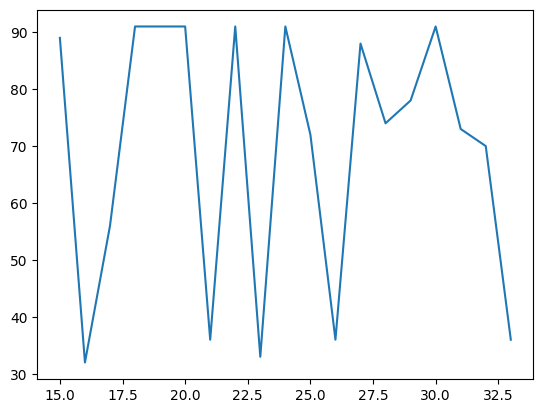

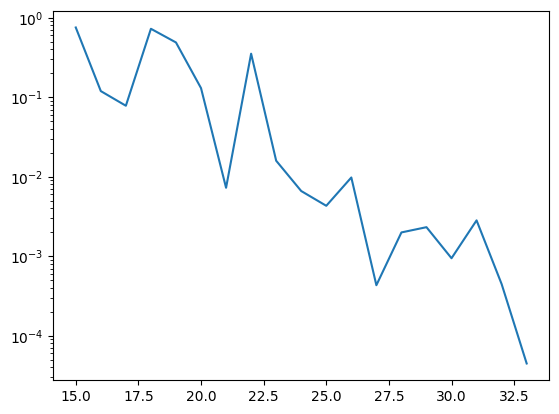

In [215]:
dftmp = df_tran_batch
Ns = []
ps = []
overlaps = []
for N in range(15, 34):
    dfslice = dftmp[dftmp['N'] == N].set_index('p')
    print(N, dfslice['overlap transferred'].idxmax(), dfslice['overlap transferred'].max())
    Ns.append(N)
    ps.append(dfslice['overlap transferred'].idxmax())
    overlaps.append(dfslice['overlap transferred'].max())

# for N, p in zip(Ns, ps):
#     if N % 2:
plt.plot(Ns, ps)
plt.show()
plt.plot(Ns, overlaps)
plt.yscale('log')

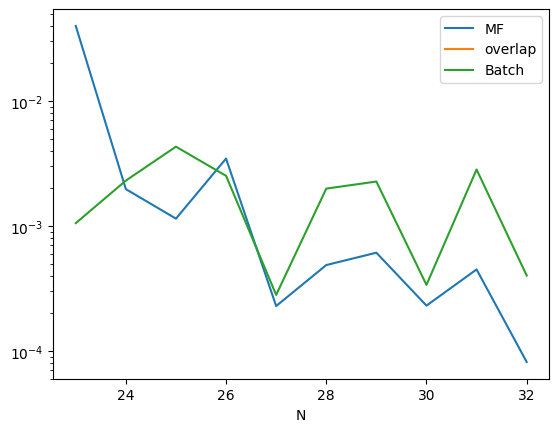

In [217]:
f, ax = plt.subplots()
for dftmp, label in [(df_tran_mf_22, 'MF'), (df_tran_overlap_22, 'overlap'), (df_tran_batch, 'Batch')]:
    dftmp[(dftmp['p'] == 73) & (dftmp['N'] >= 23)].sort_values('N').set_index('N')['overlap transferred'].plot(logy=True, ax=ax, label=label)
plt.legend()


N
23    0.001052
24    0.002304
25    0.004304
26    0.002515
27    0.000281
28    0.001988
29    0.002265
30    0.000337
31    0.002826
32    0.000401
Name: overlap transferred, dtype: float64


Text(0.5, 1.0, 'Fit: 1.12**N')

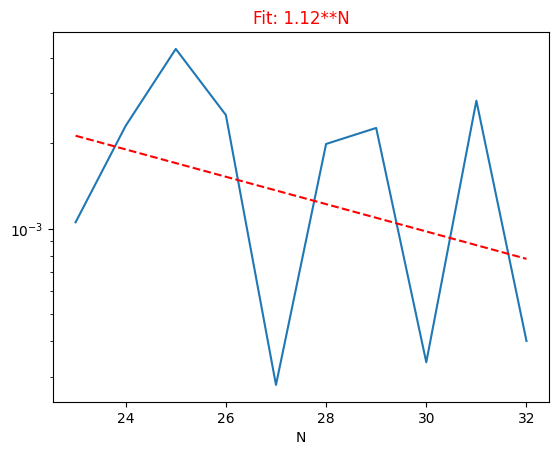

In [218]:
dftmp = df_tran_batch
to_plot = dftmp[(dftmp['p'] == 73) & (dftmp['N'] >= 23)]
print(to_plot.sort_values('N').set_index('N')['overlap transferred'])

f, ax = plt.subplots()
overlaps = to_plot.sort_values('N').set_index('N')['overlap transferred']
overlaps.plot(logy=True, ax=ax)

to_fit = np.array([np.log(1/p) for p in overlaps]).reshape(-1, 1)
Ns_to_fit = np.array(list(overlaps.index)).reshape(-1, 1)

reg = LinearRegression().fit(Ns_to_fit, to_fit)

min_ps_fit = [1/(np.e**(y)) for y, N in zip(reg.predict(Ns_to_fit), Ns_to_fit)]
plt.plot(Ns_to_fit, min_ps_fit, linestyle='dashed', c='r')
plt.title(f"Fit: {np.e**reg.coef_[0][0]:.2f}**N", c='r')

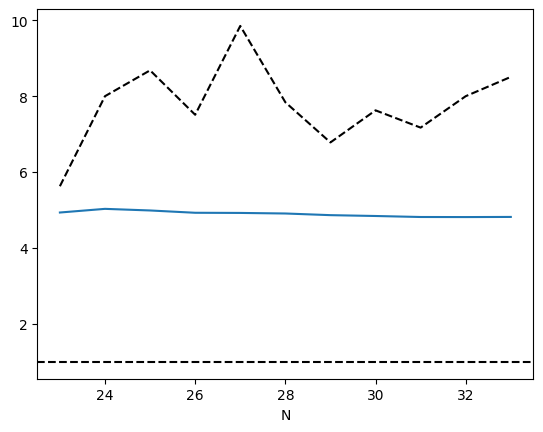

In [130]:
f, ax = plt.subplots()
dftmp = df_tran_mf_22
to_plot = dftmp[(dftmp['p'] == 138) & (dftmp['N'] >= 23)]
to_plot.sort_values('N').set_index('N')['merit factor transferred'].plot()
Ns = sorted(set(to_plot['N']))
ax.plot(Ns, [true_optimal_mf[N] for N in Ns], c='k', linestyle='dashed')
ax.axhline(1, c='k', linestyle='dashed')

In [131]:
dftmp = df_tran_mf_22
to_plot = dftmp[(dftmp['p'] == 138) & (dftmp['N'] >= 23)]
to_plot.sort_values('N').set_index('N')['merit factor transferred']

N
23    4.935771
24    5.032038
25    4.989614
26    4.928858
27    4.924746
28    4.909886
29    4.866258
30    4.843973
31    4.817541
32    4.815693
33    4.819257
Name: merit factor transferred, dtype: float64

N
23    0.072109
24    0.005124
25    0.002691
26    0.009227
27    0.000486
28    0.001079
29    0.001200
30    0.000551
31    0.000757
32    0.000224
33    0.000113
Name: overlap transferred, dtype: float64


Text(0.5, 1.0, 'Fit: 1.62**N')

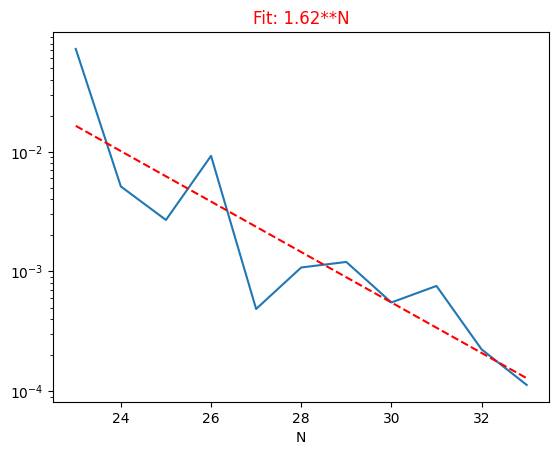

In [201]:
dftmp = df_tran_mf_22
to_plot = dftmp[(dftmp['p'] == 138) & (dftmp['N'] >= 23)]
print(to_plot.sort_values('N').set_index('N')['overlap transferred'])

f, ax = plt.subplots()
overlaps = to_plot.sort_values('N').set_index('N')['overlap transferred']
overlaps.plot(logy=True, ax=ax)

to_fit = np.array([np.log(1/p) for p in overlaps]).reshape(-1, 1)
Ns_to_fit = np.array(list(overlaps.index)).reshape(-1, 1)

reg = LinearRegression().fit(Ns_to_fit, to_fit)

min_ps_fit = [1/(np.e**(y)) for y, N in zip(reg.predict(Ns_to_fit), Ns_to_fit)]
plt.plot(Ns_to_fit, min_ps_fit, linestyle='dashed', c='r')
plt.title(f"Fit: {np.e**reg.coef_[0][0]:.2f}**N", c='r')

# Best overlap for high n

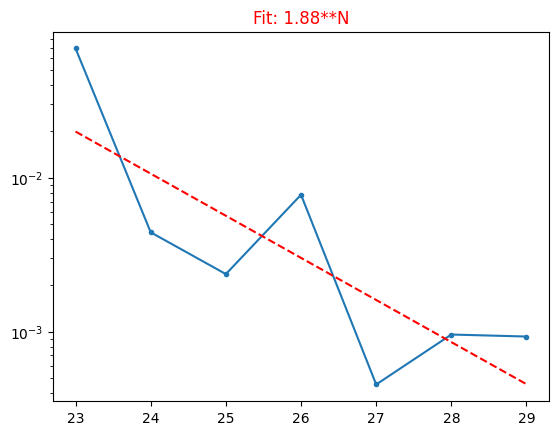

In [48]:
from sklearn.linear_model import LinearRegression

df = pd.read_json("../qokit/assets/best_known_QAOA_parameters_wrt_overlap.json", orient="index")

Ns = list(range(23,30))


overlaps = [
    pd.concat([df_tran[df_tran['N'] == N] for df_tran in [
        # df_tran_mf_13, df_tran_mf_13_2, df_tran_mf_14, df_tran_mf_15, df_tran_mf_16, df_tran_mf_17, df_tran_mf_18, df_tran_mf_19, df_tran_mf_20, 
        # df_overlap.rename(columns={'overlap':'overlap transferred'}), df_MF.rename(columns={'overlap':'overlap transferred'})
        df_tran_mf_22
    ]])['overlap transferred'].max() for N in Ns
]

plt.plot(Ns, overlaps, marker='.')

# fit only part

min_N_for_fit = 15

Ns = np.array(Ns)
overlaps = np.array(overlaps)[Ns >= min_N_for_fit]
Ns = Ns[Ns >= min_N_for_fit]

to_fit = np.array([np.log(1/p) for p in overlaps]).reshape(-1, 1)
Ns_to_fit = np.array(Ns).reshape(-1, 1)

reg = LinearRegression().fit(Ns_to_fit, to_fit)

min_ps_fit = [1/(np.e**(y)) for y, N in zip(reg.predict(Ns_to_fit), Ns_to_fit)]
plt.plot(Ns_to_fit, min_ps_fit, linestyle='dashed', c='r')
plt.title(f"Fit: {np.e**reg.coef_[0][0]:.2f}**N", c='r')

plt.yscale('log')

# Now, look at the fit

For fit, we'll use best results of transferring from N=13,14,15

<AxesSubplot: title={'center': 'Fit: N*1.44**N'}, xlabel='N'>

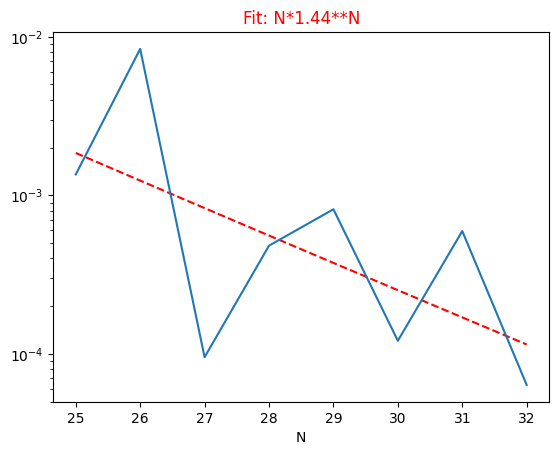

In [56]:
from sklearn.linear_model import LinearRegression

p = 25
# p = 50
all_dataframe_slices = []
for df_tran in [df_tran_overlap_22]: # [df_tran_mf_13_old, df_tran_mf_13, df_tran_mf_14, df_tran_mf_15, df_tran_mf_16, df_tran_mf_17]:
    # dataframe_slice = df_tran[df_tran['p'] == p].sort_values('N').set_index('N')['overlap transferred']
    all_dataframe_slices.append(df_tran[
        (df_tran['p'] == p) & (df_tran['N']>=23) # & (df_tran['N']<=23)
    ].sort_values('N').set_index('N')['overlap transferred'])

# take max
dataframe_slice = pd.concat(all_dataframe_slices, axis=1).max(axis=1)
    
Ns, overlaps = zip(*dataframe_slice.items())

to_fit = np.array([np.log((1/p) / N) for p, N in zip(overlaps, Ns)]).reshape(-1, 1)
Ns_to_fit = np.array(Ns).reshape(-1, 1)

reg = LinearRegression().fit(Ns_to_fit, to_fit)

min_ps_fit = [1/(N*np.e**(y)) for y, N in zip(reg.predict(Ns_to_fit), Ns_to_fit)]
plt.plot(Ns_to_fit, min_ps_fit, linestyle='dashed', c='r')
plt.title(f"Fit: N*{np.e**reg.coef_[0][0]:.2f}**N", c='r')

dataframe_slice.plot(logy=True)

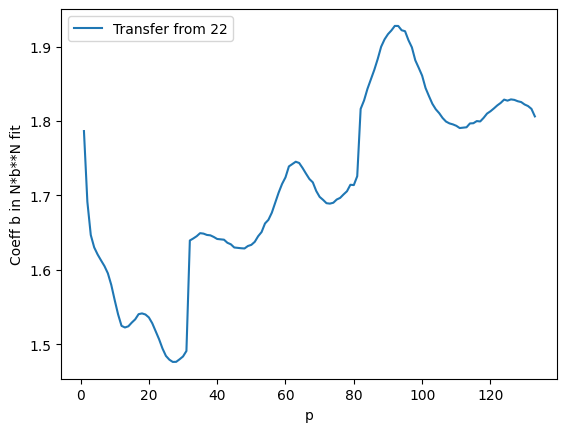

In [52]:
from sklearn.linear_model import LinearRegression

f, ax = plt.subplots()
    
# ps = sorted(set(df_tran_mf_13['p']).union(set(df_tran_mf_13_old['p']))) #.union(set(df_tran_mf_15['p'])))
ps = sorted(set(df_tran_mf_22['p']))
ps_to_plot = []
coefs = []

for p in ps:
    all_dataframe_slices = []
    for df_tran in [df_tran_mf_22]: # [df_tran_mf_13_old, df_tran_mf_13]: #, df_tran_mf_14, df_tran_mf_15]:
        # dataframe_slice = df_tran[df_tran['p'] == p].sort_values('N').set_index('N')['overlap transferred']
        all_dataframe_slices.append(df_tran[
            (df_tran['p'] == p) # & (df_tran['N']>=15) # & (df_tran['N']<=23)
        ].sort_values('N').set_index('N')['overlap transferred'])

    # take max
    dataframe_slice = pd.concat(all_dataframe_slices, axis=1).max(axis=1)
    Ns, overlaps = zip(*dataframe_slice.items())
    # if len(overlaps) < 13:
    #     continue

    to_fit = np.array([np.log((1/p) / N) for p, N in zip(overlaps, Ns)]).reshape(-1, 1)
    Ns_to_fit = np.array(Ns).reshape(-1, 1)

    reg = LinearRegression().fit(Ns_to_fit, to_fit)
    coefs.append(np.e**reg.coef_[0][0])
    ps_to_plot.append(p)

ax.plot(ps_to_plot, coefs, label="Transfer from 22")
# fit_coef = 0.07
# ax.plot(ps, [1.63/(p**fit_coef) for p in ps], linestyle='dashed', label=f'Fit: p**-{fit_coef}')
plt.xlabel('p')
plt.ylabel('Coeff b in N*b**N fit')
plt.legend()

In [133]:
print(f"Best p: {ps[np.argmin(coefs)]}")

Best p: 50


In [166]:
df.columns

Index(['N', 'p', 'merit factor', 'gamma', 'beta', 'AR', 'overlap'], dtype='object')

<AxesSubplot: title={'center': 'Fit: N*1.53**N'}, xlabel='N'>

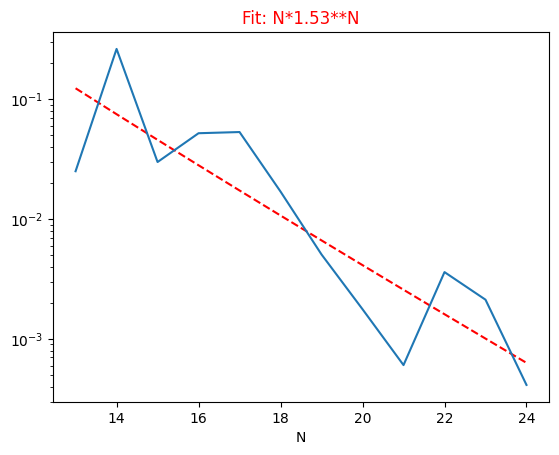

In [191]:
from sklearn.linear_model import LinearRegression

p = 11
all_dataframe_slices = []
for df_tran in [df]: #, df_tran_mf_14, df_tran_mf_15]:
    # dataframe_slice = df_tran[df_tran['p'] == p].sort_values('N').set_index('N')['overlap transferred']
    all_dataframe_slices.append(df_tran[
        (df_tran['p'] == p) & (df_tran['N']>=13) # & (df_tran['N']<=23)
    ].sort_values('N').set_index('N')['overlap'])

# take max
dataframe_slice = pd.concat(all_dataframe_slices, axis=1).max(axis=1)
    
Ns, overlaps = zip(*dataframe_slice.items())

to_fit = np.array([np.log((1/p) / N) for p, N in zip(overlaps, Ns)]).reshape(-1, 1)
Ns_to_fit = np.array(Ns).reshape(-1, 1)

reg = LinearRegression().fit(Ns_to_fit, to_fit)

min_ps_fit = [1/(N*np.e**(y)) for y, N in zip(reg.predict(Ns_to_fit), Ns_to_fit)]
plt.plot(Ns_to_fit, min_ps_fit, linestyle='dashed', c='r')
plt.title(f"Fit: N*{np.e**reg.coef_[0][0]:.2f}**N", c='r')

dataframe_slice.plot(logy=True)

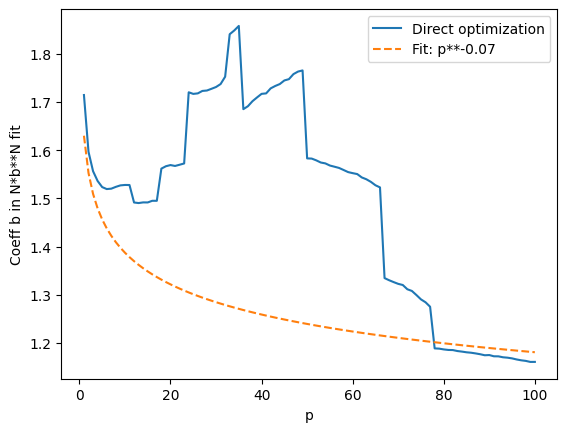

In [170]:
from sklearn.linear_model import LinearRegression

f, ax = plt.subplots()
    
ps = sorted(set(df['p'])) #.union(set(df_tran_mf_15['p'])))
ps_to_plot = []
coefs = []

for p in ps:
    all_dataframe_slices = []
    for df_tran in [df]: #, df_tran_mf_14, df_tran_mf_15]:
        # dataframe_slice = df_tran[df_tran['p'] == p].sort_values('N').set_index('N')['overlap transferred']
        all_dataframe_slices.append(df_tran[
            (df_tran['p'] == p) & (df_tran['N']>=13) # & (df_tran['N']<=23)
        ].sort_values('N').set_index('N')['overlap'])

    # take max
    dataframe_slice = pd.concat(all_dataframe_slices, axis=1).max(axis=1)
    Ns, overlaps = zip(*dataframe_slice.items())
    # if len(overlaps) < 13:
    #     continue

    to_fit = np.array([np.log((1/p) / N) for p, N in zip(overlaps, Ns)]).reshape(-1, 1)
    Ns_to_fit = np.array(Ns).reshape(-1, 1)

    reg = LinearRegression().fit(Ns_to_fit, to_fit)
    coefs.append(np.e**reg.coef_[0][0])
    ps_to_plot.append(p)

ax.plot(ps_to_plot, coefs, label="Direct optimization")
fit_coef = 0.07
ax.plot(ps, [1.63/(p**fit_coef) for p in ps], linestyle='dashed', label=f'Fit: p**-{fit_coef}')
plt.xlabel('p')
plt.ylabel('Coeff b in N*b**N fit')
plt.legend()

# Old fit

<AxesSubplot: title={'center': 'Fit: N*1.31**N'}, xlabel='N'>

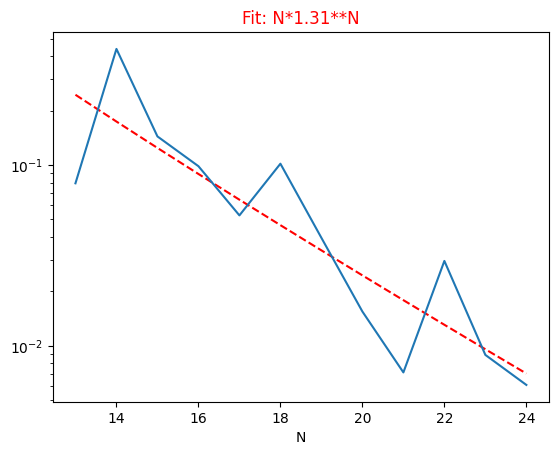

In [275]:
from sklearn.linear_model import LinearRegression

df_tran = df_tran_mf_13
p = 22

dataframe_slice = df_tran[df_tran['p'] == p].sort_values('N').set_index('N')['overlap transferred']
# dataframe_slice = df_tran[(df_tran['p'] == p) & (df_tran['N']>=15)].sort_values('N').set_index('N')['overlap transferred']

Ns, overlaps = zip(*dataframe_slice.items())

to_fit = np.array([np.log((1/p) / N) for p, N in zip(overlaps, Ns)]).reshape(-1, 1)
Ns_to_fit = np.array(Ns).reshape(-1, 1)

reg = LinearRegression().fit(Ns_to_fit, to_fit)

min_ps_fit = [1/(N*np.e**(y)) for y, N in zip(reg.predict(Ns_to_fit), Ns_to_fit)]
plt.plot(Ns_to_fit, min_ps_fit, linestyle='dashed', c='r')
plt.title(f"Fit: N*{np.e**reg.coef_[0][0]:.2f}**N", c='r')

dataframe_slice.plot(logy=True)

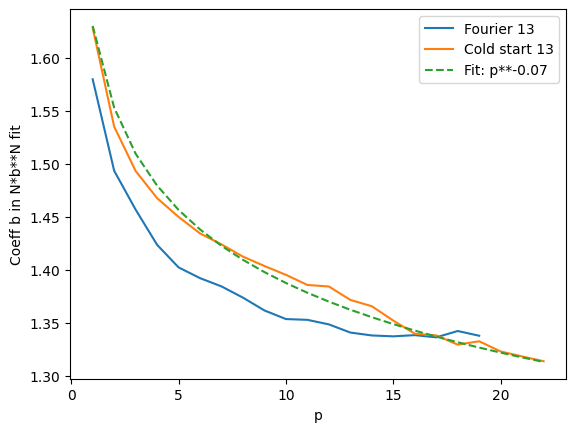

In [145]:
from sklearn.linear_model import LinearRegression

f, ax = plt.subplots()

for label, df_tran in [("Fourier 13", df_tran_o), ("Cold start 13", df_tran_mf)]:
    ps = sorted(set(df_tran['p']))
    ps_to_plot = []
    coefs = []

    for p in ps:
        # dataframe_slice = df_tran[df_tran['p'] == p].sort_values('N').set_index('N')['overlap transferred']
        dataframe_slice = df_tran[(df_tran['p'] == p) & (df_tran['N']>=11)].sort_values('N').set_index('N')['overlap transferred']
        
        Ns, overlaps = zip(*dataframe_slice.items())
        if len(overlaps) < 15:
            continue

        to_fit = np.array([np.log((1/p) / N) for p, N in zip(overlaps, Ns)]).reshape(-1, 1)
        Ns_to_fit = np.array(Ns).reshape(-1, 1)

        reg = LinearRegression().fit(Ns_to_fit, to_fit)
        coefs.append(np.e**reg.coef_[0][0])
        ps_to_plot.append(p)

    ax.plot(ps_to_plot, coefs, label=label)
    fit_coef = 0.07
ax.plot(ps, [1.63/(p**fit_coef) for p in ps], linestyle='dashed', label=f'Fit: p**-{fit_coef}')
plt.xlabel('p')
plt.ylabel('Coeff b in N*b**N fit')
plt.legend()

In [48]:
from copy import deepcopy
from pathlib import Path
import pickle

def get_df_from_wildcard(wildcard):
    rows = []
    for fname in Path("../scripts/data/").glob(wildcard):
        rows.append(pickle.load(open(fname, "rb")))
    if len(rows) > 0:
        return pd.DataFrame(rows, columns=rows[0].keys())
    else:
        return None
    
# df_tran_o = get_df_from_wildcard("1201_transfer_from_overlap_*_13.pickle")
df_tran_mf_13_old = get_df_from_wildcard("1129_transfer_*_13.pickle")

df_tran_mf_13_old['N_donor'] = 13

dfs = [df_tran_mf_13_old]

for N_donor in range(13, 22):
    df = get_df_from_wildcard(f"1205_transfer_*_{N_donor}.pickle")
    if df is not None:
        df['N_donor'] = N_donor
        dfs.append(deepcopy(df))

df = get_df_from_wildcard("1213_transfer_*_13.pickle")
df['N_donor'] = 13     

dfs.append(deepcopy(df))

In [49]:
df = pd.concat(dfs)

In [59]:
import pandas as pd
df = pd.read_json('1219_transferred_results.json')

In [60]:
idx = df.groupby("N")['overlap transferred'].transform(max) == df['overlap transferred']
df[idx].sort_values("N")

index  overlap transferred  merit factor transferred   N   p  \
2924    846             0.958713                  3.764848  10  81   
817     437             0.842294                 10.536854  11  34   
4603    866             0.587712                  5.365836  12  45   
852     472             0.959042                 13.587443  13  84   
2559    481             0.966964                  5.049256  14  77   
4707    970             0.825882                  6.602575  15  71   
5774    527             0.445347                  4.773689  16  81   
7361    819             0.387236                  4.075293  17  69   
4058    321             0.557179                  4.649565  18  71   
4318    581             0.291863                  3.573484  19  71   
4881   1144             0.140107                  3.198623  20  71   
482     102             0.027925                  2.087839  21  53   
4299    562             0.188180                  2.988242  22  71   
5554    307             0.024150                  4.399100  23  55   
577     197             0.013716                  1.902331  24  53   
1211    831             0.020312                  1.705485  25  72   
930     550             0.022486                  1.557489  26  93   
2009   1629             0.008078                  1.527441  27  98   
1722   1342             0.005134                  1.744010  28  54   
4126    389             0.004787                  2.749811  29  96   

                                                   beta  \
2924  [-0.23853825450000002, -0.1709794373, -0.14570...   
817   [0.2171351495, 0.1568631987, 0.128661183700000...   
4603  [0.219919312, 0.1368002609, 0.1162800495000000...   
852   [0.2628217843, 0.1997397981, 0.178589964000000...   
2559  [-0.23686219290000002, -0.1720200107, -0.14643...   
4707  [0.22070140740000002, 0.1464685383, 0.12738061...   
5774  [-0.2419912957, -0.1611281832, -0.128047860700...   
7361  [-0.2179778213, -0.1510765678, -0.123963205200...   
4058  [0.22070140740000002, 0.1464685383, 0.12738061...   
4318  [0.22070140740000002, 0.1464685383, 0.12738061...   
4881  [0.22070140740000002, 0.1464685383, 0.12738061...   
482   [0.2371368398, 0.1779978701, 0.154997937500000...   
4299  [0.22070140740000002, 0.1464685383, 0.12738061...   
5554  [-0.21696985370000002, -0.1356339871, -0.11525...   
577   [0.2371368398, 0.1779978701, 0.154997937500000...   
1211  [0.249771225, 0.18794645470000002, 0.167843585...   
930   [0.2637528004, 0.20447305600000001, 0.18025472...   
2009  [0.2622012735, 0.2040223585, 0.184403949100000...   
1722  [0.2269462935, 0.1309475228, 0.116865358600000...   
4126  [0.23479972870000002, 0.1752511427, 0.14695215...   

                                                  gamma  N_donor  \
2924  [0.0136959109, 0.0336701091, 0.0474690539, 0.0...       14   
817   [-0.0282698126, -0.058470675400000005, -0.0640...       13   
4603  [-0.014518022, -0.030809746500000002, -0.03529...       15   
852   [-0.0153628107, -0.0371220005, -0.0484392513, ...       13   
2559  [0.009370627500000001, 0.023185194000000003, 0...       14   
4707  [-0.0129363386, -0.027926756, -0.0335232103, -...       15   
5774  [0.0054655831, 0.0131367589, 0.0178008056, 0.0...       16   
7361  [0.0071665097, 0.0174392653, 0.024474086000000...       17   
4058  [-0.0107802822, -0.0232722967, -0.0279360086, ...       15   
4318  [-0.0102128989, -0.0220474389, -0.0264656923, ...       15   
4881  [-0.009702254, -0.020945067, -0.0251424077, -0...       15   
482   [-0.013220321, -0.0297042061, -0.0356073434, -...       13   
4299  [-0.0088202309, -0.01904097, -0.0228567343, -0...       15   
5554  [0.0052631589, 0.011617004700000001, 0.0148322...       16   
577   [-0.0115677808, -0.0259911803, -0.0311564255, ...       13   
1211  [-0.0078268843, -0.019195427, -0.0254995875, -...       13   
930   [-0.007548522, -0.0183533718, -0.0239171737000...       13   
2009  [-0.0069414597, -0.0172564295, -0.0229877834, ...       13   
172

In [58]:
df.reset_index().to_json('1219_transferred_results.json')

In [44]:
tmp = df.set_index('N')#.max('overlap transferred')

In [40]:
tmp = df[
    df['N']==13 # & (df_tran['N']<=23)
].idxmax()

0.9590415506327347

<AxesSubplot: xlabel='p'>

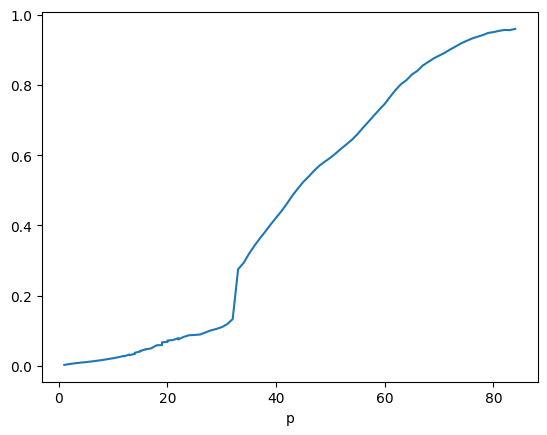

In [28]:
df[(df['N'] == 13) & (df['N_donor'] == 13)].sort_values('p').set_index('p')['overlap transferred'].plot()